In [1222]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import copy
from time import mktime

In [1289]:
def rolling_back(data, column):
    #data.set_index(index,inplace  =True)
    #data['accum_'+column+'_10'] = data[column].rolling('10min').sum()
    #data['accum_'+column+'_15'] = data[column].rolling('15min').sum()
    #data['accum_'+column+'_20'] = data[column].rolling('20min').sum()
    #data['accum_'+column+'_25'] = data[column].rolling('25min').sum()
    
    #data['accum_'+column+'_30'] = data[column].rolling('30min').sum()
    #data['accum_'+column+'_35'] = data[column].rolling('35min').sum()
    data['accum_'+column+'_40'] = data[column].rolling('40min').sum()
    #data['accum_'+column+'_45'] = data[column].rolling('45min').sum()
    #data['accum_'+column+'_50'] = data[column].rolling('50min').sum()
    #data['accum_'+column+'_55'] = data[column].rolling('55min').sum()
    #data['accum_'+column+'_60'] = data[column].rolling('60min').sum()
    return data

In [379]:
#flight data: all rows arrival at SIN, status OP, and remove blank rows for AIBT_SG, GTA1, BLT1 and ODPAX
flight = pd.read_csv("/Users/jimengyu/Data/tqgss/AOCS_flight_filtered.csv")
tqgss = pd.read_csv("/Users/jimengyu/Data/tqgss/tqgss_hist_filtered.csv")
#tqgss1 = pd.read_csv("/Users/jimengyu/Data/tqgss/tqgss_hist-2.csv")

In [380]:
flight.tail()

ALC2  FLTN  ACT5  ODPAX ORG3  TRMA  TMB1 GTA1 STYP FTYP            B1BA  \
63946   TR   477  A320    175  SIN     1     1  D30    J   OP   27/12/19 9:15   
63947   SQ   633  A359    186  SIN     2     2  E28    J   OP  27/12/19 15:41   
63948   IX   682  B738    157  SIN     2     2   E1    J   OP  27/12/19 15:11   
63949   TR   467  A320    162  SIN     1     1  T1D    J   OP  27/12/19 15:19   
63950   QF    77  B738    148  SIN     1     1  D30    J   OP  27/12/19 14:31   

       BLT1         SIBT_SG         EIBT_SG            AIBT_SG  \
63946    16  27/12/19 16:05  27/12/19 17:07  27/12/19 17:04:38   
63947    31  27/12/19 23:20  27/12/19 23:26  27/12/19 23:24:18   
63948    32  27/12/19 23:10  27/12/19 22:58  27/12/19 22:59:10   
63949    20  27/12/19 22:30  27/12/19 23:10  27/12/19 23:04:31   
63950    17  27/12/19 22:25  27/12/19 22:22  27/12/19 22:18:29   

              B1BA_SG ORG3_DEST  mon  day  hour  
63946  27/12/19 17:15       LGK   12   27    17  
63947  27/12/19 23:41       HND   12   27    23  
63948  27/12/19 23:11       TRZ   12   27    22  
63949  27/12/19 23:19       KUL   12   27    23  
63950  27/12/19 22:31       PER   12   27    22

In [381]:
flight.describe()

FLTN         ODPAX          TRMA          TMB1          BLT1  \
count  63951.000000  63951.000000  63951.000000  63951.000000  63951.000000   
mean     715.425717    143.930947      2.249347      2.250129     27.024613   
std     1147.250966     67.043062      1.004851      1.005823     14.511536   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%      286.000000    107.000000      1.000000      1.000000     13.000000   
50%      543.000000    137.000000      2.000000      2.000000     33.000000   
75%      801.000000    170.000000      3.000000      3.000000     38.000000   
max     9915.000000    520.000000      4.000000      4.000000     48.000000   

                mon           day          hour  
count  63951.000000  63951.000000  63951.000000  
mean      10.262420     16.273272     13.765258  
std        1.271742      8.754229      6.322310  
min        8.000000      1.000000      0.000000  
25%        9.000000      9.000000      9.000000  
50%       10.000000     17.000000     15.000000  
75%       11.000000     24.000000     19.000000  
max       12.000000     31.000000     23.000000

In [382]:
tqgss.describe()

CURRENT_WAITING_TIME  CURRENT_PAXQUEUE_STANDARD  \
count                   0.0               4.065500e+06   
mean                    NaN               6.053864e+00   
std                     NaN               1.590936e+01   
min                     NaN               0.000000e+00   
25%                     NaN               0.000000e+00   
50%                     NaN               1.000000e+00   
75%                     NaN               4.000000e+00   
max                     NaN               1.820000e+02   

       CURRENT_PAXQUEUE_PRIORITY  PAX_ENTRIES_LASTMIN  PAX_EXIT_LASTMIN  \
count               4.065500e+06                  0.0               0.0   
mean                2.922066e-01                  NaN               NaN   
std                 7.815281e-01                  NaN               NaN   
min                 0.000000e+00                  NaN               NaN   
25%                 0.000000e+00                  NaN               NaN   
50%                 0.000000e+00                  NaN               NaN   
75%                 0.000000e+00                  NaN               NaN   
max                 2.100000e+01                  NaN               NaN   

       TAXI_INT  TAXI_EXT  ENTRY_THROUGH_STANDARD  EXIT_THROUGH_STANDARD  \
count       0.0       0.0            4.065668e+06           4.065668e+06   
mean        NaN       NaN            2.237766e+00           2.498220e+00   
std         NaN       NaN            3.378675e+00           3.644140e+00   
min         NaN       NaN            0.000000e+00           0.000000e+00   
25%         NaN       NaN            0.000000e+00           0.000000e+00   
50%         NaN       NaN            1.000000e+00           1.000000e+00   
75%         NaN       NaN            3.000000e+00           4.000000e+00   
max         NaN       NaN            3.600000e+01           4.400000e+01   

       WAITTIME_STANDARD  ENTRY_THROUGH_PRIORITY  EXIT_THROUGH_PRIORITY  \
count       4.065668e+06            4.065668e+06           4.065668e+06   
mean        1.866148e+00            1.908621e-01           7.302574e-01   
std         2.993116e+00            7.026940e-01           1.845534e+00   
min         1.000000e+00            0.000000e+00           0.000000e+00   
25%         1.000000e+00            0.000000e+00           0.000000e+00   
50%         1.000000e+00            0.000000e+00           0.000000e+00   
75%         1.000000e+00            0.000000e+00           0.000000e+00   
max         4.500000e+01            2.100000e+01           2.400000e+01   

       WAITTIME_PRIORITY  
count                0.0  
mean                 NaN  
std                  NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max                  NaN

In [383]:
flight['ODPAX'].describe()

count    63951.000000
mean       143.930947
std         67.043062
min          0.000000
25%        107.000000
50%        137.000000
75%        170.000000
max        520.000000
Name: ODPAX, dtype: float64

In [384]:
flight['AIBT_SG'] = pd.to_datetime(flight['AIBT_SG'], format = "%d/%m/%y %H:%M:%S")
tqgss['TS'] = pd.to_datetime(tqgss['TS'], format = "%d-%m-%y %I:%M:%S %p")

In [385]:
flight = flight.sort_values(['AIBT_SG'])
flight.reset_index(inplace = True)
flight = flight.drop(['index'], axis = 1)

In [386]:
tqgss = tqgss.sort_values(['TS'])
tqgss.reset_index(inplace = True)
tqgss = tqgss.drop(['index'], axis = 1)

In [387]:
tqgss = tqgss.drop(['CURRENT_WAITING_TIME','PAX_ENTRIES_LASTMIN','PAX_EXIT_LASTMIN','TAXI_INT',
                   'TAXI_EXT','PROCESS_DATE','WAITTIME_STANDARD','WAITTIME_PRIORITY'],axis = 1)

In [388]:
tqgss['monday'] = tqgss['TS'].dt.month
tqgss['day'] = tqgss['TS'].dt.day
tqgss['hour'] = tqgss['TS'].dt.hour
tqgss['second'] = tqgss['TS'].dt.second

In [389]:
tqgss['CURRENT_PAXQUEUE_TOTAL'] = tqgss['CURRENT_PAXQUEUE_STANDARD'] + tqgss['CURRENT_PAXQUEUE_PRIORITY']
tqgss['ENTRY_TOTAL'] = tqgss['ENTRY_THROUGH_STANDARD'] + tqgss['ENTRY_THROUGH_PRIORITY']
tqgss['EXIT_TOTAL'] = tqgss['EXIT_THROUGH_STANDARD'] + tqgss['EXIT_THROUGH_PRIORITY']

In [390]:
tqgss['TS'].min()

Timestamp('2019-10-01 00:00:00')

In [391]:
tqgss['TS'].max()

Timestamp('2019-12-31 23:59:45')

In [392]:
flight['AIBT_SG'].min()

Timestamp('2019-08-20 00:01:00')

In [393]:
flight['AIBT_SG'].max()

Timestamp('2019-12-27 23:43:53')

In [394]:
tqgss.dtypes

TS                           datetime64[ns]
TERMINAL                             object
LOCATION                             object
CURRENT_PAXQUEUE_STANDARD           float64
CURRENT_PAXQUEUE_PRIORITY           float64
ENTRY_THROUGH_STANDARD                int64
EXIT_THROUGH_STANDARD                 int64
ENTRY_THROUGH_PRIORITY                int64
EXIT_THROUGH_PRIORITY                 int64
time                                 object
monday                                int64
day                                   int64
hour                                  int64
second                                int64
CURRENT_PAXQUEUE_TOTAL              float64
ENTRY_TOTAL                           int64
EXIT_TOTAL                            int64
dtype: object

In [18]:
#flight_origin.to_csv("/Users/jimengyu/Data/tqgss/flight_origin_counts.csv")

/Users/jimengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [395]:
######since pax inflow update every 1 min
tqgss_T2 = tqgss[(tqgss['TERMINAL']=='T2')&(tqgss['second']==0)]
#tqgss_T2N = tqgss[(tqgss['LOCATION']=='T2N')&(tqgss['second']==0)]
#tqgss_T2S = tqgss[(tqgss['LOCATION']=='T2S')&(tqgss['second']==0)]

In [396]:
######since pax inflow update every 1 min
tqgss_T1 = tqgss[(tqgss['TERMINAL']=='T1')&(tqgss['second']==0)]
#tqgss_T1A = tqgss[(tqgss['LOCATION']=='T1A')&(tqgss['second']==0)]
#tqgss_T1B = tqgss[(tqgss['LOCATION']=='T1B')&(tqgss['second']==0)]
#tqgss_T1C = tqgss[(tqgss['LOCATION']=='T1C')&(tqgss['second']==0)]
#tqgss_T1D = tqgss[(tqgss['LOCATION']=='T1D')&(tqgss['second']==0)]

In [397]:
######since pax inflow update every 1 min
tqgss_T3 = tqgss[(tqgss['TERMINAL']=='T3')&(tqgss['second']==0)]
#tqgss_T3N = tqgss[(tqgss['LOCATION']=='T3N')&(tqgss['second']==0)]
#tqgss_T3S = tqgss[(tqgss['LOCATION']=='T3S')&(tqgss['second']==0)]

In [398]:
tqgss_T1.isnull().any()

TS                           False
TERMINAL                     False
LOCATION                     False
CURRENT_PAXQUEUE_STANDARD    False
CURRENT_PAXQUEUE_PRIORITY    False
ENTRY_THROUGH_STANDARD       False
EXIT_THROUGH_STANDARD        False
ENTRY_THROUGH_PRIORITY       False
EXIT_THROUGH_PRIORITY        False
time                         False
monday                       False
day                          False
hour                         False
second                       False
CURRENT_PAXQUEUE_TOTAL       False
ENTRY_TOTAL                  False
EXIT_TOTAL                   False
dtype: bool

In [399]:
tqgss_T2.isnull().any()

TS                           False
TERMINAL                     False
LOCATION                     False
CURRENT_PAXQUEUE_STANDARD     True
CURRENT_PAXQUEUE_PRIORITY     True
ENTRY_THROUGH_STANDARD       False
EXIT_THROUGH_STANDARD        False
ENTRY_THROUGH_PRIORITY       False
EXIT_THROUGH_PRIORITY        False
time                         False
monday                       False
day                          False
hour                         False
second                       False
CURRENT_PAXQUEUE_TOTAL        True
ENTRY_TOTAL                  False
EXIT_TOTAL                   False
dtype: bool

In [400]:
tqgss_T3.isnull().any()

TS                           False
TERMINAL                     False
LOCATION                     False
CURRENT_PAXQUEUE_STANDARD     True
CURRENT_PAXQUEUE_PRIORITY     True
ENTRY_THROUGH_STANDARD       False
EXIT_THROUGH_STANDARD        False
ENTRY_THROUGH_PRIORITY       False
EXIT_THROUGH_PRIORITY        False
time                         False
monday                       False
day                          False
hour                         False
second                       False
CURRENT_PAXQUEUE_TOTAL        True
ENTRY_TOTAL                  False
EXIT_TOTAL                   False
dtype: bool

In [401]:
num_missing_T2 = (tqgss_T2.isnull()).sum()/tqgss_T2.shape[0]
num_missing_T3 = (tqgss_T3.isnull()).sum()/tqgss_T3.shape[0]

In [402]:
num_missing_T2

TS                           0.000000
TERMINAL                     0.000000
LOCATION                     0.000000
CURRENT_PAXQUEUE_STANDARD    0.000027
CURRENT_PAXQUEUE_PRIORITY    0.000027
ENTRY_THROUGH_STANDARD       0.000000
EXIT_THROUGH_STANDARD        0.000000
ENTRY_THROUGH_PRIORITY       0.000000
EXIT_THROUGH_PRIORITY        0.000000
time                         0.000000
monday                       0.000000
day                          0.000000
hour                         0.000000
second                       0.000000
CURRENT_PAXQUEUE_TOTAL       0.000027
ENTRY_TOTAL                  0.000000
EXIT_TOTAL                   0.000000
dtype: float64

In [403]:
num_missing_T3

TS                           0.000000
TERMINAL                     0.000000
LOCATION                     0.000000
CURRENT_PAXQUEUE_STANDARD    0.000132
CURRENT_PAXQUEUE_PRIORITY    0.000132
ENTRY_THROUGH_STANDARD       0.000000
EXIT_THROUGH_STANDARD        0.000000
ENTRY_THROUGH_PRIORITY       0.000000
EXIT_THROUGH_PRIORITY        0.000000
time                         0.000000
monday                       0.000000
day                          0.000000
hour                         0.000000
second                       0.000000
CURRENT_PAXQUEUE_TOTAL       0.000132
ENTRY_TOTAL                  0.000000
EXIT_TOTAL                   0.000000
dtype: float64

In [406]:
######sum different taxi stands inflow together
######sum by the same timestamp
tqgss_T1_inflow = tqgss_T1.groupby(['TS'])['ENTRY_TOTAL'].sum()
tqgss_T2_inflow = tqgss_T2.groupby(['TS'])['ENTRY_TOTAL'].sum()
tqgss_T3_inflow = tqgss_T3.groupby(['TS'])['ENTRY_TOTAL'].sum()

In [408]:
######sum different taxi stands outflow together
######sum by the same timestamp
tqgss_T1_out = tqgss_T1.groupby(['TS'])['EXIT_TOTAL'].sum()
tqgss_T2_out = tqgss_T2.groupby(['TS'])['EXIT_TOTAL'].sum()
tqgss_T3_out = tqgss_T3.groupby(['TS'])['EXIT_TOTAL'].sum()

In [409]:
######sum different taxi stands queue together
######sum by the same timestamp
tqgss_T1_queue = tqgss_T1.groupby(['TS'])['CURRENT_PAXQUEUE_TOTAL'].sum()
tqgss_T2_queue = tqgss_T2.groupby(['TS'])['CURRENT_PAXQUEUE_TOTAL'].sum()
tqgss_T3_queue = tqgss_T3.groupby(['TS'])['CURRENT_PAXQUEUE_TOTAL'].sum()

In [410]:
tqgss_T1_inflow_df = pd.DataFrame(tqgss_T1_inflow)
tqgss_T2_inflow_df = pd.DataFrame(tqgss_T2_inflow)
tqgss_T3_inflow_df = pd.DataFrame(tqgss_T3_inflow)
tqgss_T1_out_df = pd.DataFrame(tqgss_T1_out)
tqgss_T2_out_df = pd.DataFrame(tqgss_T2_out)
tqgss_T3_out_df = pd.DataFrame(tqgss_T3_out)
tqgss_T1_queue_df = pd.DataFrame(tqgss_T1_queue)
tqgss_T2_queue_df = pd.DataFrame(tqgss_T2_queue)
tqgss_T3_queue_df = pd.DataFrame(tqgss_T3_queue)

In [411]:
#merge inflow, outflow, queue together as a complete dataframe
tqgss_T1_df = pd.merge(tqgss_T1_inflow_df, tqgss_T1_out_df, how='left', on='TS')
tqgss_T1_df = pd.merge(tqgss_T1_df, tqgss_T1_queue_df, how='left', on='TS')
tqgss_T1_df['TERMINAL'] = 1

tqgss_T2_df = pd.merge(tqgss_T2_inflow_df, tqgss_T2_out_df, how='left', on='TS')
tqgss_T2_df = pd.merge(tqgss_T2_df, tqgss_T2_queue_df, how='left', on='TS')
tqgss_T2_df['TERMINAL'] = 2

tqgss_T3_df = pd.merge(tqgss_T3_inflow_df, tqgss_T3_out_df, how='left', on='TS')
tqgss_T3_df = pd.merge(tqgss_T3_df, tqgss_T3_queue_df, how='left', on='TS')
tqgss_T3_df['TERMINAL'] = 3

In [412]:
tqgss_T1_df

ENTRY_TOTAL  EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  TERMINAL
TS                                                                            
2019-10-01 00:00:00            2           5                     5.0         1
2019-10-01 00:01:00            9           6                     4.0         1
2019-10-01 00:02:00            6           7                     7.0         1
2019-10-01 00:03:00           17          13                     9.0         1
2019-10-01 00:04:00            4          10                    12.0         1
...                          ...         ...                     ...       ...
2019-12-31 23:55:00           13           8                   154.0         1
2019-12-31 23:56:00           23          25                   156.0         1
2019-12-31 23:57:00           18          13                   153.0         1
2019-12-31 23:58:00           14          12                   140.0         1
2019-12-31 23:59:00           23          20                   139.0         1

[132056 rows x 4 columns]

In [413]:
#use T1_test to check whether we have data points every 1min
T1_test = copy.deepcopy(tqgss_T1_df)

In [414]:
T1_test.reset_index(inplace = True)

In [415]:
T1_test['time_delta'] = T1_test['TS'].shift(-1) - T1_test['TS']

In [416]:
T1_test[T1_test['time_delta'] != "00:01:00"]

TS  ENTRY_TOTAL  EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  \
2879   2019-10-02 23:59:00            7           1                     5.0   
13018  2019-10-10 01:58:00            0           1                     4.0   
14375  2019-10-11 02:29:00            0           0                     2.0   
53037  2019-11-06 23:59:00           11           7                    27.0   
57297  2019-11-09 23:59:00           25          19                    96.0   
80335  2019-11-26 00:57:00           18          17                    31.0   
85975  2019-11-29 22:59:00           13          20                   105.0   
132055 2019-12-31 23:59:00           23          20                   139.0   

        TERMINAL time_delta  
2879           1   01:01:00  
13018          1   01:55:00  
14375          1   01:09:00  
53037          1   01:01:00  
57297          1   01:01:00  
80335          1   00:03:00  
85975          1   01:01:00  
132055         1        NaT

In [1441]:
#test set to test resample in 5min interval
test = [['2019-10-01 01:00:00', 1.5],['2019-10-01 01:04:00', 4],['2019-10-01 01:08:00', 6],['2019-10-01 01:16:00', 2],
       ['2019-10-01 01:20:00', 5],['2019-10-01 01:31:00', 1]]

In [1442]:
test = pd.DataFrame(test, columns=['TS','Value'])

In [1443]:
test['TS'] = pd.to_datetime(test['TS'])

In [1444]:
test.index = test['TS']

In [1445]:
test = test.drop(columns=['TS'],axis=1)

In [1446]:
test

Value
TS                        
2019-10-01 01:00:00    1.5
2019-10-01 01:04:00    4.0
2019-10-01 01:08:00    6.0
2019-10-01 01:16:00    2.0
2019-10-01 01:20:00    5.0
2019-10-01 01:31:00    1.0

In [1447]:
#test results: all left means next 5min sum, and closed on left side
#all right means: past 5min sum, and closed on right side
test.resample('5min', closed = 'left', label = 'left')['Value'].sum(min_count = 1)

TS
2019-10-01 01:00:00    5.5
2019-10-01 01:05:00    6.0
2019-10-01 01:10:00    NaN
2019-10-01 01:15:00    2.0
2019-10-01 01:20:00    5.0
2019-10-01 01:25:00    NaN
2019-10-01 01:30:00    1.0
Freq: 5T, Name: Value, dtype: float64

In [424]:
#here inflow should be next 5min inflow, thus closed = left, and label = left
tqgss_T1_inflow_aggre = tqgss_T1_df.resample('5min', closed = 'left', 
                                                  label = 'left')['ENTRY_TOTAL'].sum(min_count=1)
tqgss_T2_inflow_aggre = tqgss_T2_df.resample('5min', closed = 'left', 
                                                  label = 'left')['ENTRY_TOTAL'].sum(min_count=1)
tqgss_T3_inflow_aggre = tqgss_T3_df.resample('5min', closed = 'left', 
                                                  label = 'left')['ENTRY_TOTAL'].sum(min_count=1)

In [425]:
#the same for outflow, actually in prediction model, we don't use outflow
tqgss_T1_out_aggre = tqgss_T1_df.resample('5min', closed = 'left', 
                                                  label = 'left')['EXIT_TOTAL'].sum(min_count=1)
tqgss_T2_out_aggre = tqgss_T2_df.resample('5min', closed = 'left', 
                                                  label = 'left')['EXIT_TOTAL'].sum(min_count=1)
tqgss_T3_out_aggre = tqgss_T3_df.resample('5min', closed = 'left', 
                                                  label = 'left')['EXIT_TOTAL'].sum(min_count=1)

In [426]:
tqgss_T1_df.reset_index(inplace = True)
tqgss_T2_df.reset_index(inplace = True)
tqgss_T3_df.reset_index(inplace = True)

In [427]:
tqgss_T1_df['TS'] = pd.to_datetime(tqgss_T1_df['TS'])
tqgss_T1_df['min'] = tqgss_T1_df['TS'].dt.minute

tqgss_T2_df['TS'] = pd.to_datetime(tqgss_T2_df['TS'])
tqgss_T2_df['min'] = tqgss_T2_df['TS'].dt.minute

tqgss_T3_df['TS'] = pd.to_datetime(tqgss_T3_df['TS'])
tqgss_T3_df['min'] = tqgss_T3_df['TS'].dt.minute

In [428]:
tqgss_T1_df.set_index(['TS'],inplace = True)
tqgss_T2_df.set_index(['TS'],inplace = True)
tqgss_T3_df.set_index(['TS'],inplace = True)

In [429]:
#paxQ length is number just at that timestamp rather than a mean value for next/past 5min
tqgss_T1_queue = tqgss_T1_df[tqgss_T1_df['min']%5 == 0]['CURRENT_PAXQUEUE_TOTAL']
tqgss_T2_queue = tqgss_T2_df[tqgss_T2_df['min']%5 == 0]['CURRENT_PAXQUEUE_TOTAL']
tqgss_T3_queue = tqgss_T3_df[tqgss_T3_df['min']%5 == 0]['CURRENT_PAXQUEUE_TOTAL']

In [430]:
tqgss_T1_df[:20]

ENTRY_TOTAL  EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  \
TS                                                                     
2019-10-01 00:00:00            2           5                     5.0   
2019-10-01 00:01:00            9           6                     4.0   
2019-10-01 00:02:00            6           7                     7.0   
2019-10-01 00:03:00           17          13                     9.0   
2019-10-01 00:04:00            4          10                    12.0   
2019-10-01 00:05:00            9           6                     6.0   
2019-10-01 00:06:00            5           9                     7.0   
2019-10-01 00:07:00           11           5                     5.0   
2019-10-01 00:08:00            6          13                    10.0   
2019-10-01 00:09:00           17           5                     4.0   
2019-10-01 00:10:00           14          18                    17.0   
2019-10-01 00:11:00            9           9                    16.0   
2019-10-01 00:12:00            9           5                    12.0   
2019-10-01 00:13:00           17           8                    18.0   
2019-10-01 00:14:00           13          13                    28.0   
2019-10-01 00:15:00            7          13                    18.0   
2019-10-01 00:16:00           13          10                    14.0   
2019-10-01 00:17:00            4          18                    15.0   
2019-10-01 00:18:00           20          13                     7.0   
2019-10-01 00:19:00           12          10                    16.0   

                     TERMINAL  min  
TS                                  
2019-10-01 00:00:00         1    0  
2019-10-01 00:01:00         1    1  
2019-10-01 00:02:00         1    2  
2019-10-01 00:03:00         1    3  
2019-10-01 00:04:00         1    4  
2019-10-01 00:05:00         1    5  
2019-10-01 00:06:00         1    6  
2019-10-01 00:07:00         1    7  
2019-10-01 00:08:00         1    8  
2019-10-01 00:09:00         1    9  
2019-10-01 00:10:00         1   10  
2019-10-01 00:11:00         1   11  
2019-10-01 00:12:00         1   12  
2019-10-01 00:13:00         1   13  
2019-10-01 00:14:00         1   14  
2019-10-01 00:15:00         1   15  
2019-10-01 00:16:00         1   16  
2019-10-01 00:17:00         1   17  
2019-10-01 00:18:00         1   18  
2019-10-01 00:19:00         1   19

In [433]:
tqgss_T1_inflow_aggre

TS
2019-10-01 00:00:00     38.0
2019-10-01 00:05:00     48.0
2019-10-01 00:10:00     62.0
2019-10-01 00:15:00     56.0
2019-10-01 00:20:00     74.0
                       ...  
2019-12-31 23:35:00     79.0
2019-12-31 23:40:00    124.0
2019-12-31 23:45:00    156.0
2019-12-31 23:50:00     75.0
2019-12-31 23:55:00     91.0
Freq: 5T, Name: ENTRY_TOTAL, Length: 26496, dtype: float64

In [434]:
T1_inflow_aggre_df = pd.DataFrame(tqgss_T1_inflow_aggre)
T2_inflow_aggre_df = pd.DataFrame(tqgss_T2_inflow_aggre)
T3_inflow_aggre_df = pd.DataFrame(tqgss_T3_inflow_aggre)

T1_out_aggre_df = pd.DataFrame(tqgss_T1_out_aggre)
T2_out_aggre_df = pd.DataFrame(tqgss_T2_out_aggre)
T3_out_aggre_df = pd.DataFrame(tqgss_T3_out_aggre)

T1_queue_df = pd.DataFrame(tqgss_T1_queue)
T2_queue_df = pd.DataFrame(tqgss_T2_queue)
T3_queue_df = pd.DataFrame(tqgss_T3_queue)

In [436]:
#merge resampled values into one dataframe
tqgss_T1_aggre = pd.merge(T1_inflow_aggre_df, T1_out_aggre_df, how='left', on='TS')
tqgss_T1_aggre = pd.merge(tqgss_T1_aggre, T1_queue_df, how='left', on='TS')
tqgss_T1_aggre['TERMINAL'] = 1

tqgss_T2_aggre = pd.merge(T2_inflow_aggre_df, T2_out_aggre_df, how='left', on='TS')
tqgss_T2_aggre = pd.merge(tqgss_T2_aggre, T2_queue_df, how='left', on='TS')
tqgss_T2_aggre['TERMINAL'] = 2

tqgss_T3_aggre = pd.merge(T3_inflow_aggre_df, T3_out_aggre_df, how='left', on='TS')
tqgss_T3_aggre = pd.merge(tqgss_T3_aggre, T3_queue_df, how='left', on='TS')
tqgss_T3_aggre['TERMINAL'] = 3

In [437]:
#then this is dataset to be combined with flight data, and for prediction
#entry_total is inflow for next 5min, like at 00:00:00, it is sum of inflow [00:00:00, 00:05:00)
tqgss_T1_aggre

ENTRY_TOTAL  EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  TERMINAL
TS                                                                            
2019-10-01 00:00:00         38.0        41.0                     5.0         1
2019-10-01 00:05:00         48.0        38.0                     6.0         1
2019-10-01 00:10:00         62.0        53.0                    17.0         1
2019-10-01 00:15:00         56.0        64.0                    18.0         1
2019-10-01 00:20:00         74.0        64.0                    18.0         1
...                          ...         ...                     ...       ...
2019-12-31 23:35:00         79.0       110.0                   113.0         1
2019-12-31 23:40:00        124.0       111.0                    60.0         1
2019-12-31 23:45:00        156.0        89.0                   100.0         1
2019-12-31 23:50:00         75.0        73.0                   154.0         1
2019-12-31 23:55:00         91.0        78.0                   154.0         1

[26496 rows x 4 columns]

In [439]:
tqgss_T1_aggre.describe()

ENTRY_TOTAL    EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  TERMINAL
count  26413.000000  26413.000000            26411.000000   26496.0
mean      40.635634     39.914739               28.746394       1.0
std       29.904074     27.546744               54.134581       0.0
min        0.000000      0.000000                0.000000       1.0
25%       15.000000     16.000000                4.000000       1.0
50%       35.000000     35.000000                9.000000       1.0
75%       61.000000     61.000000               23.000000       1.0
max      208.000000    176.000000              497.000000       1.0

In [440]:
tqgss_T2_aggre.describe()

ENTRY_TOTAL    EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  TERMINAL
count  26448.000000  26448.000000            26448.000000   26496.0
mean      27.449750     38.434475               13.089383       2.0
std       19.740669     27.063784               26.886356       0.0
min        0.000000      0.000000                0.000000       2.0
25%       13.000000     18.000000                2.000000       2.0
50%       24.000000     33.000000                6.000000       2.0
75%       39.000000     54.000000               12.000000       2.0
max      178.000000    290.000000              319.000000       2.0

In [441]:
tqgss_T3_aggre.describe()

ENTRY_TOTAL    EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  TERMINAL
count  26448.000000  26448.000000            26448.000000   26496.0
mean      25.299645     45.773858                7.595508       3.0
std       18.690105     35.006038               16.441928       0.0
min        0.000000      0.000000                0.000000       3.0
25%       11.000000     18.000000                1.000000       3.0
50%       22.000000     39.000000                3.000000       3.0
75%       36.000000     66.000000                7.000000       3.0
max      142.000000    253.000000              239.000000       3.0

In [442]:
#output tqgss data as csv file
tqgss_T1_aggre.to_csv("/Users/jimengyu/Data/tqgss/predModel/tqgss_T1_aggre_5_forw.csv")
tqgss_T2_aggre.to_csv("/Users/jimengyu/Data/tqgss/predModel/tqgss_T2_aggre_5_forw.csv")
tqgss_T3_aggre.to_csv("/Users/jimengyu/Data/tqgss/predModel/tqgss_T3_aggre_5_forw.csv")

In [155]:
#################flight data preprocessing##################
############################################################
############################################################
############################################################

In [1449]:
#split by terminal, use TRMA instead of TMB1 after checking gates
flight_T1 = flight[(flight['TRMA'] == 1)]
flight_T2 = flight[(flight['TRMA'] == 2)]
flight_T3 = flight[(flight['TRMA'] == 3)]

In [1450]:
flight_T1.isnull().any()

ALC2         False
FLTN         False
ACT5          True
ODPAX        False
ORG3         False
TRMA         False
TMB1         False
GTA1         False
STYP         False
FTYP         False
B1BA          True
BLT1         False
SIBT_SG      False
EIBT_SG      False
AIBT_SG      False
B1BA_SG       True
ORG3_DEST    False
mon          False
day          False
hour         False
dtype: bool

In [445]:
flight_T2.isnull().any()

ALC2         False
FLTN         False
ACT5          True
ODPAX        False
ORG3         False
TRMA         False
TMB1         False
GTA1         False
STYP         False
FTYP         False
B1BA          True
BLT1         False
SIBT_SG      False
EIBT_SG      False
AIBT_SG      False
B1BA_SG       True
ORG3_DEST    False
mon          False
day          False
hour         False
dtype: bool

In [446]:
flight_T3.isnull().any()

ALC2         False
FLTN         False
ACT5          True
ODPAX        False
ORG3         False
TRMA         False
TMB1         False
GTA1         False
STYP         False
FTYP         False
B1BA          True
BLT1         False
SIBT_SG      False
EIBT_SG      False
AIBT_SG      False
B1BA_SG       True
ORG3_DEST    False
mon          False
day          False
hour         False
dtype: bool

In [840]:
#####origin and gates summary

In [166]:
flight_origin_T1 = flight_T1['ORG3_DEST'].value_counts()
flight_origin_T2 = flight_T2['ORG3_DEST'].value_counts()
flight_origin_T3 = flight_T3['ORG3_DEST'].value_counts()

In [167]:
flight_origin_T1 = pd.DataFrame(flight_origin_T1)
flight_origin_T2 = pd.DataFrame(flight_origin_T2)
flight_origin_T3 = pd.DataFrame(flight_origin_T3)

In [168]:
#check origin odpax sum
flight_T1_origin_odpax = flight_T1.groupby(['ORG3_DEST'])['ODPAX'].sum()
flight_T2_origin_odpax = flight_T2.groupby(['ORG3_DEST'])['ODPAX'].sum()
flight_T3_origin_odpax = flight_T3.groupby(['ORG3_DEST'])['ODPAX'].sum()

flight_T1_origin_odpax = pd.DataFrame(flight_T1_origin_odpax)
flight_T2_origin_odpax = pd.DataFrame(flight_T2_origin_odpax)
flight_T3_origin_odpax = pd.DataFrame(flight_T3_origin_odpax)

In [169]:
flight_T1_gate = flight_T1.groupby(['GTA1'])['ODPAX'].sum()

In [170]:
flight_T1_gate

GTA1
C1       76021
C11      83998
C13     120246
C15     117148
C16      80980
C17       1226
C17L     64086
C17R     69801
C18      80589
C19      55555
C2         151
C20      59457
C22      60188
C23     130172
C24     127464
C25     111028
C26     111118
D30      72155
D32      92871
D34      18401
D35      72774
D36      93256
D37      90188
D38      66897
D40      16562
D40L     47926
D40R     48232
D41     103285
D42      37134
D42L     36977
D42R     39504
D44      96935
D46      56227
D47     113582
D48     105302
D49     105334
F53        108
T1C      47250
T1D       7249
T2F        867
T3A        103
Name: ODPAX, dtype: int64

In [1469]:
flight_T1[flight_T1['ORG3_DEST'] == 'PEK']['GTA1'].value_counts()

D47    55
D41    45
D48    32
D36    29
D37    27
C24    25
C13    21
C1     18
D32    13
D44    12
D49    11
C15    11
C26     6
D46     5
C25     5
D42     4
D40     4
D34     3
C22     3
C20     2
C23     2
C17     1
Name: GTA1, dtype: int64

In [342]:
flight_T1_origin_odpax.to_csv("/Users/jimengyu/Data/tqgss/T1_origin_odpax_counts_new.csv")
flight_T2_origin_odpax.to_csv("/Users/jimengyu/Data/tqgss/T2_origin_odpax_counts_new.csv")
flight_T3_origin_odpax.to_csv("/Users/jimengyu/Data/tqgss/T3_origin_odpax_counts_new.csv")

In [754]:
flight_T1_origin_odpax = pd.read_csv("/Users/jimengyu/Data/tqgss/T1_origin_odpax_counts_new.csv")

In [366]:
flight_T1_gate.to_csv("/Users/jimengyu/Data/tqgss/T1_gate_odpax_counts_new.csv")

/Users/jimengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [755]:
#compute percentage for each cities total odpax
flight_T1_origin_odpax['percentage'] = flight_T1_origin_odpax['ODPAX']/(flight_T1_origin_odpax['ODPAX'].sum())

In [756]:
#sort by percentage
flight_T1_origin_odpax.sort_values(['percentage'],inplace = True, ascending=False)

In [757]:
#only plot cities has percentage > 1%
flight_T1_origin = flight_T1_origin_odpax[flight_T1_origin_odpax['percentage']>0.01]

/Users/jimengyu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


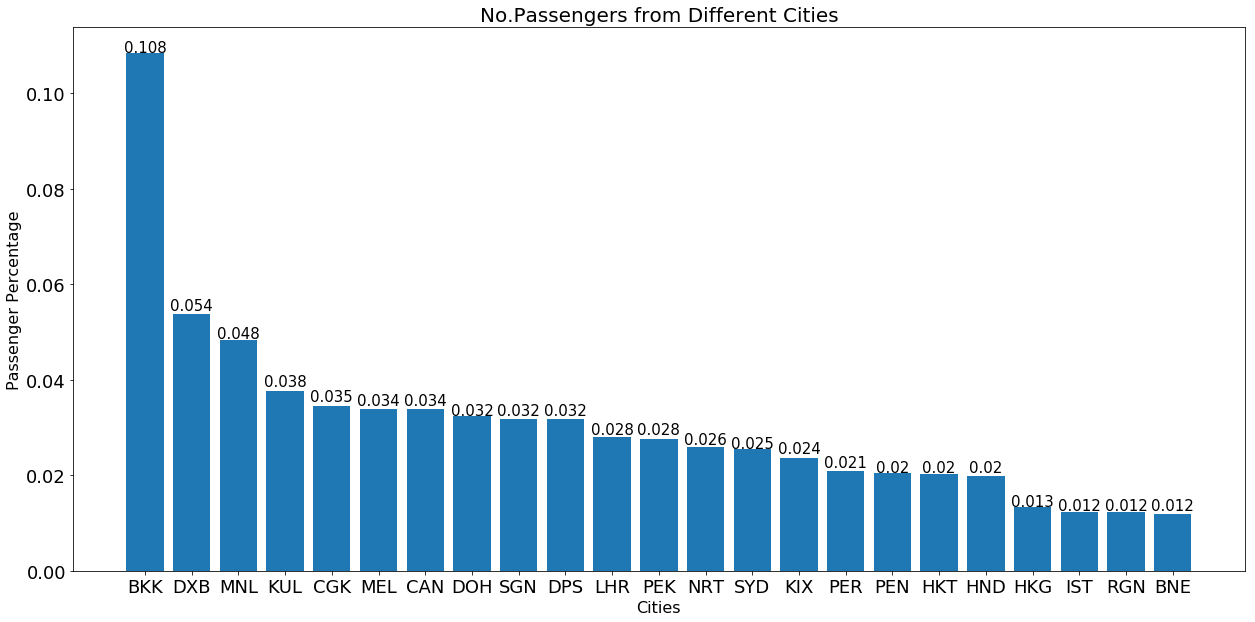

In [774]:
fig = plt.figure(figsize=(21, 10))
x = flight_T1_origin['ORG3_DEST']
y = flight_T1_origin['percentage']
rects = plt.bar(x, y)
ax = plt.subplot(111)
for rect in rects:  #rects 是三根柱子的集合
    height = round(rect.get_height(),3)
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), size=15, ha='center', va='bottom')
ax.set_xlabel('Cities',fontsize=16)
ax.set_ylabel('Passenger Percentage',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('No.Passengers from Different Cities',fontsize = 20)
fig.savefig('test_new.jpg')

In [841]:
###########create timestamp and variable#############

In [1079]:
flight_T1.reset_index(inplace = True)

In [1080]:
flight_T1 = flight_T1.drop(['index'],axis=1)

In [1081]:
flight_T1 = flight_T1.drop(['ALC2','FLTN','ORG3','TMB1','STYP','FTYP','B1BA','SIBT_SG','EIBT_SG'],axis=1)

In [1082]:
flight_T1['AIBT_SG'] = pd.to_datetime(flight_T1['AIBT_SG'])

In [1083]:
flight_T1.sort_values(['AIBT_SG'],inplace = True)

In [1084]:
#ceiled to 5 min interval
#but the problem is ceiled timestamp is not consecutive
#for the convenience of create some features related to time differece, not use resample directly.
flight_T1['AIBT_SG_ceil'] = flight_T1['AIBT_SG'].dt.ceil('5min')

In [1085]:
flight_T1.head(6)

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG       B1BA_SG ORG3_DEST  \
0  B772    226     1   C22    14 2019-08-20 00:09:40  20/8/19 0:25       NRT   
1  A320    116     1   D46    20 2019-08-20 00:13:12  20/8/19 0:24       CGK   
2  A320    128     1  D42R    19 2019-08-20 00:15:20  20/8/19 0:26       HKT   
3  A320    127     1  D42L    17 2019-08-20 00:18:24  20/8/19 0:30       PNH   
4  A320    118     1   C24    12 2019-08-20 00:24:00  20/8/19 0:42       SGN   
5  A320    123     1   D38    11 2019-08-20 00:26:38  20/8/19 0:40       BKK   

   mon  day  hour        AIBT_SG_ceil  
0    8   20     0 2019-08-20 00:10:00  
1    8   20     0 2019-08-20 00:15:00  
2    8   20     0 2019-08-20 00:20:00  
3    8   20     0 2019-08-20 00:20:00  
4    8   20     0 2019-08-20 00:25:00  
5    8   20     0 2019-08-20 00:30:00

In [1086]:
#here the idea is create new rows/timestamp that making AIBT_SG_ceil consecutive(no jumped timestamp because of lacking data)
#and fill all others columns by 0
df_temp = copy.deepcopy(flight_T1)
idx = pd.DatetimeIndex(start=min(df_temp.AIBT_SG_ceil), end=max(df_temp.AIBT_SG_ceil), freq='5min')

/Users/jimengyu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [1087]:
df_temp.head(5)

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG       B1BA_SG ORG3_DEST  \
0  B772    226     1   C22    14 2019-08-20 00:09:40  20/8/19 0:25       NRT   
1  A320    116     1   D46    20 2019-08-20 00:13:12  20/8/19 0:24       CGK   
2  A320    128     1  D42R    19 2019-08-20 00:15:20  20/8/19 0:26       HKT   
3  A320    127     1  D42L    17 2019-08-20 00:18:24  20/8/19 0:30       PNH   
4  A320    118     1   C24    12 2019-08-20 00:24:00  20/8/19 0:42       SGN   

   mon  day  hour        AIBT_SG_ceil  
0    8   20     0 2019-08-20 00:10:00  
1    8   20     0 2019-08-20 00:15:00  
2    8   20     0 2019-08-20 00:20:00  
3    8   20     0 2019-08-20 00:20:00  
4    8   20     0 2019-08-20 00:25:00

In [1088]:
df_temp1 = df_temp.drop_duplicates(subset=['AIBT_SG_ceil'])
df_temp0 = pd.concat([df_temp1,df_temp])
#df_temp0: is those dropped duplicated rows/AIBT_SG_ceil
df_temp0 = df_temp0.drop_duplicates(subset=['AIBT_SG','ODPAX','ORG3_DEST','ACT5'], keep = False)

In [1089]:
df_temp0.head()

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG        B1BA_SG  \
3   A320    127     1  D42L    17 2019-08-20 00:18:24   20/8/19 0:30   
6   A320    110     1   D47    18 2019-08-20 00:27:16   20/8/19 0:39   
27  A320    116     1   D35    18 2019-08-20 12:34:46  20/8/19 12:47   
29   NaN    162     1   C24    10 2019-08-20 12:46:39  20/8/19 12:56   
35  B738    149     1   C16    13 2019-08-20 14:19:06  20/8/19 14:30   

   ORG3_DEST  mon  day  hour        AIBT_SG_ceil  
3        PNH    8   20     0 2019-08-20 00:20:00  
6        PER    8   20     0 2019-08-20 00:30:00  
27       CGK    8   20    12 2019-08-20 12:35:00  
29       CAN    8   20    12 2019-08-20 12:50:00  
35       XMN    8   20    14 2019-08-20 14:20:00

In [1090]:
df_temp1.set_index(['AIBT_SG_ceil'],inplace = True)
df_temp2 = pd.DataFrame(df_temp1, index=idx)

In [1091]:
#df_temp2: new dataframe has totally consecutive ceiled 5min timestamp
df_temp2.reset_index(inplace = True)
df_temp2.rename(columns = {'index':'AIBT_SG_ceil'},inplace = True)

In [1092]:
df_temp2.set_index(['AIBT_SG_ceil'],inplace = True)
df_temp0.set_index(['AIBT_SG_ceil'],inplace = True)

In [1094]:
df_temp2

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
AIBT_SG_ceil                                                             
2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   
2019-08-20 00:30:00  A320  123.0   1.0   D38  11.0 2019-08-20 00:26:38   
...                   ...    ...   ...   ...   ...                 ...   
2019-12-27 23:20:00  A320  145.0   1.0   T1C  13.0 2019-12-27 23:15:01   
2019-12-27 23:25:00   NaN    NaN   NaN   NaN   NaN                 NaT   
2019-12-27 23:30:00  A320  171.0   1.0   C13  11.0 2019-12-27 23:25:03   
2019-12-27 23:35:00  A320  149.0   1.0   D35  16.0 2019-12-27 23:34:05   
2019-12-27 23:40:00  A320  155.0   1.0   T1C  10.0 2019-12-27 23:37:11   

                            B1BA_SG ORG3_DEST   mon   day  hour  
AIBT_SG_ceil                                                     
2019-08-20 00:10:00    20/8/19 0:25       NRT   8.0  20.0   0.0  
2019-08-20 00:15:00    20/8/19 0:24       CGK   8.0  20.0   0.0  
2019-08-20 00:20:00    20/8/19 0:26       HKT   8.0  20.0   0.0  
2019-08-20 00:25:00    20/8/19 0:42       SGN   8.0  20.0   0.0  
2019-08-20 00:30:00    20/8/19 0:40       BKK   8.0  20.0   0.0  
...                             ...       ...   ...   ...   ...  
2019-12-27 23:20:00  27/12/19 23:41       MNL  12.0  27.0  23.0  
2019-12-27 23:25:00             NaN       NaN   NaN   NaN   NaN  
2019-12-27 23:30:00  27/12/19 23:37       PEN  12.0  27.0  23.0  
2019-12-27 23:35:00  27/12/19 23:46       CGK  12.0  27.0  23.0  
2019-12-27 23:40:00  27/12/19 23:59       PEN  12.0  27.0  23.0  

[37435 rows x 11 columns]

In [1095]:
#added df_temp2 the dropped rows
df_temp3 = pd.concat([df_temp0, df_temp2])

In [1096]:
df_temp3.reset_index(inplace = True)

In [1097]:
df_temp3['AIBT_SG'] = pd.to_datetime(df_temp3['AIBT_SG'])
df_temp3['AIBT_SG_ceil'] = pd.to_datetime(df_temp3['AIBT_SG_ceil'])

In [1098]:
#fill those NaT timestamp by ceiled timestamp
df_temp3['AIBT_SG'].fillna(df_temp3['AIBT_SG_ceil'],inplace = True)

In [1099]:
df_temp3.sort_values(['AIBT_SG'],inplace = True)

In [1100]:
df_temp3['ceil_delta'] = (df_temp3['AIBT_SG_ceil'] - df_temp3['AIBT_SG_ceil'].shift(1)).dt.seconds/60

In [1101]:
#used to delete rows with same AIBT_SG_ceil, but smaller AIBT_SG, because we are computing cumulative value
df_temp3['ceil_delta_1'] = (df_temp3['AIBT_SG_ceil'] - df_temp3['AIBT_SG_ceil'].shift(-1)).dt.seconds/60

In [1102]:
df_temp3['ceil_delta'].describe()

count    40842.000000
mean         4.582782
std          1.382774
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ceil_delta, dtype: float64

In [1103]:
df_temp3['ceil_delta_1'].describe()

count    40842.000000
mean      1315.258557
std        396.856162
min          0.000000
25%       1435.000000
50%       1435.000000
75%       1435.000000
max       1435.000000
Name: ceil_delta_1, dtype: float64

In [1104]:
#fill all other NaN value by 0, include ODPAX
df_temp3.fillna(0,inplace = True)

In [1105]:
df_temp3.reset_index(inplace = True)

In [1106]:
df_temp3 = df_temp3.drop(['index'], axis = 1)

In [1448]:
#original dataframe 
df_temp

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG         B1BA_SG  \
0      B772    226     1   C22    14 2019-08-20 00:09:40    20/8/19 0:25   
1      A320    116     1   D46    20 2019-08-20 00:13:12    20/8/19 0:24   
2      A320    128     1  D42R    19 2019-08-20 00:15:20    20/8/19 0:26   
3      A320    127     1  D42L    17 2019-08-20 00:18:24    20/8/19 0:30   
4      A320    118     1   C24    12 2019-08-20 00:24:00    20/8/19 0:42   
...     ...    ...   ...   ...   ...                 ...             ...   
17029  A320    126     1   C19    10 2019-12-27 23:17:00  27/12/19 23:28   
17030  A320    171     1   C13    11 2019-12-27 23:25:03  27/12/19 23:37   
17031  B77W    261     1   C24    14 2019-12-27 23:28:02  27/12/19 23:42   
17032  A320    149     1   D35    16 2019-12-27 23:34:05  27/12/19 23:46   
17033  A320    155     1   T1C    10 2019-12-27 23:37:11  27/12/19 23:59   

      ORG3_DEST  mon  day  hour        AIBT_SG_ceil  
0           NRT    8   20     0 2019-08-20 00:10:00  
1           CGK    8   20     0 2019-08-20 00:15:00  
2           HKT    8   20     0 2019-08-20 00:20:00  
3           PNH    8   20     0 2019-08-20 00:20:00  
4           SGN    8   20     0 2019-08-20 00:25:00  
...         ...  ...  ...   ...                 ...  
17029       HKT   12   27    23 2019-12-27 23:20:00  
17030       PEN   12   27    23 2019-12-27 23:30:00  
17031       MEL   12   27    23 2019-12-27 23:30:00  
17032       CGK   12   27    23 2019-12-27 23:35:00  
17033       PEN   12   27    23 2019-12-27 23:40:00  

[17034 rows x 12 columns]

In [1107]:
#new dataframe
df_temp3

AIBT_SG_ceil  ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
0     2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
1     2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2     2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
3     2019-08-20 00:20:00  A320  127.0   1.0  D42L  17.0 2019-08-20 00:18:24   
4     2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   
...                   ...   ...    ...   ...   ...   ...                 ...   
40838 2019-12-27 23:25:00     0    0.0   0.0     0   0.0 2019-12-27 23:25:00   
40839 2019-12-27 23:30:00  A320  171.0   1.0   C13  11.0 2019-12-27 23:25:03   
40840 2019-12-27 23:30:00  B77W  261.0   1.0   C24  14.0 2019-12-27 23:28:02   
40841 2019-12-27 23:35:00  A320  149.0   1.0   D35  16.0 2019-12-27 23:34:05   
40842 2019-12-27 23:40:00  A320  155.0   1.0   T1C  10.0 2019-12-27 23:37:11   

              B1BA_SG ORG3_DEST   mon   day  hour  ceil_delta  ceil_delta_1  
0        20/8/19 0:25       NRT   8.0  20.0   0.0         0.0        1435.0  
1        20/8/19 0:24       CGK   8.0  20.0   0.0         5.0        1435.0  
2        20/8/19 0:26       HKT   8.0  20.0   0.0         5.0           0.0  
3        20/8/19 0:30       PNH   8.0  20.0   0.0         0.0        1435.0  
4        20/8/19 0:42       SGN   8.0  20.0   0.0         5.0        1435.0  
...               ...       ...   ...   ...   ...         ...           ...  
40838               0         0   0.0   0.0   0.0         5.0        1435.0  
40839  27/12/19 23:37       PEN  12.0  27.0  23.0         5.0           0.0  
40840  27/12/19 23:42       MEL  12.0  27.0  23.0         0.0        1435.0  
40841  27/12/19 23:46       CGK  12.0  27.0  23.0         5.0        1435.0  
40842  27/12/19 23:59       PEN  12.0  27.0  23.0         5.0           0.0  

[40843 rows x 14 columns]

In [1108]:
df_temp3.isnull().any()

AIBT_SG_ceil    False
ACT5            False
ODPAX           False
TRMA            False
GTA1            False
BLT1            False
AIBT_SG         False
B1BA_SG         False
ORG3_DEST       False
mon             False
day             False
hour            False
ceil_delta      False
ceil_delta_1    False
dtype: bool

In [1109]:
df_temp3.set_index(['AIBT_SG_ceil'],inplace = True)

In [1470]:
flight_T1 = copy.deepcopy(df_temp3)

In [1471]:
flight_T1.head(10)

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
AIBT_SG_ceil                                                             
2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
2019-08-20 00:20:00  A320  127.0   1.0  D42L  17.0 2019-08-20 00:18:24   
2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   
2019-08-20 00:30:00  A320  123.0   1.0   D38  11.0 2019-08-20 00:26:38   
2019-08-20 00:30:00  A320  110.0   1.0   D47  18.0 2019-08-20 00:27:16   
2019-08-20 00:35:00     0    0.0   0.0     0   0.0 2019-08-20 00:35:00   
2019-08-20 00:40:00     0    0.0   0.0     0   0.0 2019-08-20 00:40:00   
2019-08-20 00:45:00     0    0.0   0.0     0   0.0 2019-08-20 00:45:00   

                          B1BA_SG ORG3_DEST  mon   day  hour  ceil_delta  \
AIBT_SG_ceil                                                               
2019-08-20 00:10:00  20/8/19 0:25       NRT  8.0  20.0   0.0         0.0   
2019-08-20 00:15:00  20/8/19 0:24       CGK  8.0  20.0   0.0         5.0   
2019-08-20 00:20:00  20/8/19 0:26       HKT  8.0  20.0   0.0         5.0   
2019-08-20 00:20:00  20/8/19 0:30       PNH  8.0  20.0   0.0         0.0   
2019-08-20 00:25:00  20/8/19 0:42       SGN  8.0  20.0   0.0         5.0   
2019-08-20 00:30:00  20/8/19 0:40       BKK  8.0  20.0   0.0         5.0   
2019-08-20 00:30:00  20/8/19 0:39       PER  8.0  20.0   0.0         0.0   
2019-08-20 00:35:00             0         0  0.0   0.0   0.0         5.0   
2019-08-20 00:40:00             0         0  0.0   0.0   0.0         5.0   
2019-08-20 00:45:00             0         0  0.0   0.0   0.0         5.0   

                     ceil_delta_1  
AIBT_SG_ceil                       
2019-08-20 00:10:00        1435.0  
2019-08-20 00:15:00        1435.0  
2019-08-20 00:20:00           0.0  
2019-08-20 00:20:00        1435.0  
2019-08-20 00:25:00        1435.0  
2019-08-20 00:30:00           0.0  
2019-08-20 00:30:00        1435.0  
2019-08-20 00:35:00        1435.0  
2019-08-20 00:40:00        1435.0  
2019-08-20 00:45:00        1435.0

In [1472]:
#######some major cities for T1, total ODPAX >1.5%#################
flight_T1['BKK'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='BKK')) else 0, axis = 1)#Bangkok
flight_T1['DXB'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='DXB')) else 0, axis = 1)#Dubai
flight_T1['MNL'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='MNL')) else 0, axis = 1)#Manila
flight_T1['KUL'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='KUL')) else 0, axis = 1)#Kuala Lumpur
flight_T1['CGK'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='CGK')) else 0, axis = 1)#Jakarta
flight_T1['CAN'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='CAN')) else 0, axis = 1)#Guangzhou
flight_T1['MEL'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='MEL')) else 0, axis = 1)#Melbourne
flight_T1['DPS'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='DPS')) else 0, axis = 1)#Bali
flight_T1['SGN'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='SGN')) else 0, axis = 1)#Ho Chi Minh
flight_T1['DOH'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='DOH')) else 0, axis = 1)#Doha
flight_T1['LHR'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='LHR')) else 0, axis = 1)#London
flight_T1['PEK'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='PEK')) else 0, axis = 1)#Beijing
flight_T1['NRT'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='NRT')) else 0, axis = 1)#Tokyo
flight_T1['SYD'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='SYD')) else 0, axis = 1)#Sydeny
flight_T1['KIX'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='KIX')) else 0, axis = 1)#Osaka
flight_T1['PEN'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='PEN')) else 0, axis = 1)#Penang
flight_T1['HKT'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='HKT')) else 0, axis = 1)#Phuket
flight_T1['PER'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='PER')) else 0, axis = 1)#Perth
flight_T1['HND'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='HND')) else 0, axis = 1)#Tokyo

In [1473]:
#############besides major cities, aggregate other countries odpax################
#####mainland China, cities including: 
flight_T1['ml_China'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='NKG')|(x['ORG3_DEST']=='FOC')
                                                       |(x['ORG3_DEST']=='HAK')|(x['ORG3_DEST']=='SZX')
                                                       |(x['ORG3_DEST']=='WUH')|(x['ORG3_DEST']=='HGH')
                                                       |(x['ORG3_DEST']=='INC')|(x['ORG3_DEST']=='DLC')
                                                       |(x['ORG3_DEST']=='XMN')|(x['ORG3_DEST']=='TSN')
                                                       |(x['ORG3_DEST']=='TAO')|(x['ORG3_DEST']=='CKG')
                                                       |(x['ORG3_DEST']=='XIY')|(x['ORG3_DEST']=='SWA')
                                                       |(x['ORG3_DEST']=='SHE')|(x['ORG3_DEST']=='HET')
                                                       |(x['ORG3_DEST']=='XUZ')|(x['ORG3_DEST']=='CSX')
                                                       |(x['ORG3_DEST']=='NNG')|(x['ORG3_DEST']=='CGO')
                                                       |(x['ORG3_DEST']=='HRB')|(x['ORG3_DEST']=='KMG')
                                                       |(x['ORG3_DEST']=='WUX')|(x['ORG3_DEST']=='NGB')
                                                       |(x['ORG3_DEST']=='TNA')|(x['ORG3_DEST']=='KHN')
                                                       |(x['ORG3_DEST']=='KWE')|(x['ORG3_DEST']=='SYX')
                                                       |(x['ORG3_DEST']=='HFE')) else 0, axis = 1)

In [1474]:
#######Hong Kong, Macau and Taiwan##############
flight_T1['HMT'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='HKG')|(x['ORG3_DEST']=='MFM')
                                                  |(x['ORG3_DEST']=='TPE')|(x['ORG3_DEST']=='KHH')) else 0, axis = 1)

In [1475]:
##########Europe travellers besides from London##############
####including: Turkey: IST Finland: HEL Netherlands:AMS France:CDG Germany:TXL Greece:ATH
flight_T1['Europe'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='IST')|(x['ORG3_DEST']=='HEL')
                                                       |(x['ORG3_DEST']=='AMS')|(x['ORG3_DEST']=='CDG')
                                                       |(x['ORG3_DEST']=='TXL')|(x['ORG3_DEST']=='ATH')) else 0, axis = 1)

In [1476]:
##########Southeast Asia Countries#####################
###including: Thiland, Indonesia, Malaysia, Philippines, Vietnam, India, Cambodia, Myanmar, Laos, East Timor
###besides those cities: Bangkok, Manila, Kuala Lumpur, Jakarta, Bali, Ho Chi Minh, Penang, Phuket
flight_T1['SE_Asia'] = flight_T1.apply(lambda x: 1 if ((x['ORG3_DEST']=='RGN')|(x['ORG3_DEST']=='SUB')
                                                       |(x['ORG3_DEST']=='PNH')|(x['ORG3_DEST']=='KNO')
                                                       |(x['ORG3_DEST']=='IPH')|(x['ORG3_DEST']=='CRK')
                                                       |(x['ORG3_DEST']=='TRZ')|(x['ORG3_DEST']=='MAA')
                                                       |(x['ORG3_DEST']=='HDY')|(x['ORG3_DEST']=='CNX')
                                                       |(x['ORG3_DEST']=='KBV')|(x['ORG3_DEST']=='REP')
                                                       |(x['ORG3_DEST']=='ATQ')|(x['ORG3_DEST']=='DAD')
                                                       |(x['ORG3_DEST']=='LGK')|(x['ORG3_DEST']=='DMK')
                                                       |(x['ORG3_DEST']=='CJB')|(x['ORG3_DEST']=='KCH')
                                                       |(x['ORG3_DEST']=='HYD')|(x['ORG3_DEST']=='HAN')
                                                       |(x['ORG3_DEST']=='TRV')|(x['ORG3_DEST']=='CEB')
                                                       |(x['ORG3_DEST']=='VTZ')|(x['ORG3_DEST']=='PKU')
                                                       |(x['ORG3_DEST']=='PLM')|(x['ORG3_DEST']=='LPQ')
                                                       |(x['ORG3_DEST']=='BKI')|(x['ORG3_DEST']=='KUA')
                                                       |(x['ORG3_DEST']=='KBR')|(x['ORG3_DEST']=='DIL')
                                                       |(x['ORG3_DEST']=='COK')|(x['ORG3_DEST']=='VTE')) else 0, axis = 1)

In [1477]:
flight_T1['other'] = 1 - flight_T1['BKK'] - flight_T1['DXB'] - flight_T1['MNL']- flight_T1['KUL']- flight_T1['CGK']- flight_T1['CAN']- flight_T1['MEL']- flight_T1['DPS']- flight_T1['SGN']- flight_T1['DOH']- flight_T1['LHR']- flight_T1['PEK']- flight_T1['NRT']- flight_T1['SYD']- flight_T1['KIX']- flight_T1['PEN']- flight_T1['HKT']- flight_T1['PER']- flight_T1['HND']- flight_T1['ml_China']-flight_T1['HMT']- flight_T1['Europe']- flight_T1['SE_Asia']

In [1478]:
######different gates
flight_T1['close_gate'] = flight_T1.apply(lambda x: 1 if ((x['GTA1']=='C1')|(x['GTA1']=='C11')
                                                       |(x['GTA1']=='C13')|(x['GTA1']=='C20')
                                                       |(x['GTA1']=='C22')|(x['GTA1']=='D30')
                                                       |(x['GTA1']=='D32')|(x['GTA1']=='D40')
                                                       |(x['GTA1']=='D40L')|(x['GTA1']=='D40R')
                                                       |(x['GTA1']=='D41')|(x['GTA1']=='D42')
                                                       |(x['GTA1']=='D42L')|(x['GTA1']=='D42R')
                                                       |(x['GTA1']=='D44')) else 0, axis = 1)

In [1479]:
flight_T1['mid_gate'] = flight_T1.apply(lambda x: 1 if ((x['GTA1']=='C15')|(x['GTA1']=='C16')
                                                       |(x['GTA1']=='C17')|(x['GTA1']=='C17L')
                                                       |(x['GTA1']=='C17R')|(x['GTA1']=='C23')
                                                       |(x['GTA1']=='D34')|(x['GTA1']=='D35')
                                                       |(x['GTA1']=='D36')|(x['GTA1']=='D46')) else 0, axis = 1)

In [1480]:
flight_T1['far_gate'] = flight_T1.apply(lambda x: 1 if ((x['GTA1']=='C18')|(x['GTA1']=='C19')
                                                       |(x['GTA1']=='C24')|(x['GTA1']=='C25')
                                                       |(x['GTA1']=='C26')|(x['GTA1']=='D37')
                                                       |(x['GTA1']=='D38')|(x['GTA1']=='D47')
                                                       |(x['GTA1']=='D48')|(x['GTA1']=='D49')) else 0, axis = 1)

In [1178]:
flight_T1.head()

ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
AIBT_SG_ceil                                                             
2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
2019-08-20 00:20:00  A320  127.0   1.0  D42L  17.0 2019-08-20 00:18:24   
2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   

                          B1BA_SG ORG3_DEST  mon   day  ...  ml_China  HMT  \
AIBT_SG_ceil                                            ...                  
2019-08-20 00:10:00  20/8/19 0:25       NRT  8.0  20.0  ...         0    0   
2019-08-20 00:15:00  20/8/19 0:24       CGK  8.0  20.0  ...         0    0   
2019-08-20 00:20:00  20/8/19 0:26       HKT  8.0  20.0  ...         0    0   
2019-08-20 00:20:00  20/8/19 0:30       PNH  8.0  20.0  ...         0    0   
2019-08-20 00:25:00  20/8/19 0:42       SGN  8.0  20.0  ...         0    0   

                     Europe  SE_Asia  other  close_gate  mid_gate  far_gate  \
AIBT_SG_ceil                                                                  
2019-08-20 00:10:00       0        0      0           1         0         0   
2019-08-20 00:15:00       0        0      0           0         1         0   
2019-08-20 00:20:00       0        0      0           1         0         0   
2019-08-20 00:20:00       0        1      0           1         0         0   
2019-08-20 00:25:00       0        0      0           0         0         1   

                     test  test2  
AIBT_SG_ceil                      
2019-08-20 00:10:00     1      1  
2019-08-20 00:15:00     1      1  
2019-08-20 00:20:00     1      1  
2019-08-20 00:20:00     1      1  
2019-08-20 00:25:00     1      1  

[5 rows x 42 columns]

In [1483]:
flight_T1.columns

Index(['ACT5', 'ODPAX', 'TRMA', 'GTA1', 'BLT1', 'AIBT_SG', 'B1BA_SG',
       'ORG3_DEST', 'mon', 'day', 'hour', 'ceil_delta', 'ceil_delta_1', 'BKK',
       'DXB', 'MNL', 'KUL', 'CGK', 'CAN', 'MEL', 'DPS', 'SGN', 'DOH', 'LHR',
       'PEK', 'NRT', 'SYD', 'KIX', 'PEN', 'HKT', 'PER', 'HND', 'ml_China',
       'HMT', 'Europe', 'SE_Asia', 'other', 'close_gate', 'mid_gate',
       'far_gate', 'ODPAX_BKK', 'ODPAX_DXB', 'ODPAX_MNL', 'ODPAX_KUL',
       'ODPAX_CGK', 'ODPAX_CAN', 'ODPAX_MEL', 'ODPAX_DPS', 'ODPAX_SGN',
       'ODPAX_DOH', 'ODPAX_LHR', 'ODPAX_PEK', 'ODPAX_NRT', 'ODPAX_SYD',
       'ODPAX_KIX', 'ODPAX_PEN', 'ODPAX_HKT', 'ODPAX_PER', 'ODPAX_HND',
       'ODPAX_ml_China', 'ODPAX_HMT', 'ODPAX_Europe', 'ODPAX_SE_Asia',
       'ODPAX_other'],
      dtype='object')

In [1485]:
flight_T1['close_gate'].sum()

6240

In [1486]:
flight_T1['mid_gate'].sum()

4468

In [1487]:
flight_T1['far_gate'].sum()

5911

In [1482]:
flight_T1['ODPAX_BKK'] = flight_T1['ODPAX']*flight_T1['BKK']
flight_T1['ODPAX_DXB'] = flight_T1['ODPAX']*flight_T1['DXB']
flight_T1['ODPAX_MNL'] = flight_T1['ODPAX']*flight_T1['MNL']
flight_T1['ODPAX_KUL'] = flight_T1['ODPAX']*flight_T1['KUL']
flight_T1['ODPAX_CGK'] = flight_T1['ODPAX']*flight_T1['CGK']
flight_T1['ODPAX_CAN'] = flight_T1['ODPAX']*flight_T1['CAN']
flight_T1['ODPAX_MEL'] = flight_T1['ODPAX']*flight_T1['MEL']
flight_T1['ODPAX_DPS'] = flight_T1['ODPAX']*flight_T1['DPS']
flight_T1['ODPAX_SGN'] = flight_T1['ODPAX']*flight_T1['SGN']
flight_T1['ODPAX_DOH'] = flight_T1['ODPAX']*flight_T1['DOH']
flight_T1['ODPAX_LHR'] = flight_T1['ODPAX']*flight_T1['LHR']
flight_T1['ODPAX_PEK'] = flight_T1['ODPAX']*flight_T1['PEK']
flight_T1['ODPAX_NRT'] = flight_T1['ODPAX']*flight_T1['NRT']
flight_T1['ODPAX_SYD'] = flight_T1['ODPAX']*flight_T1['SYD']
flight_T1['ODPAX_KIX'] = flight_T1['ODPAX']*flight_T1['KIX']
flight_T1['ODPAX_PEN'] = flight_T1['ODPAX']*flight_T1['PEN']
flight_T1['ODPAX_HKT'] = flight_T1['ODPAX']*flight_T1['HKT']
flight_T1['ODPAX_PER'] = flight_T1['ODPAX']*flight_T1['PER']
flight_T1['ODPAX_HND'] = flight_T1['ODPAX']*flight_T1['HND']
flight_T1['ODPAX_ml_China'] = flight_T1['ODPAX']*flight_T1['ml_China']
flight_T1['ODPAX_HMT'] = flight_T1['ODPAX']*flight_T1['HMT']
flight_T1['ODPAX_Europe'] = flight_T1['ODPAX']*flight_T1['Europe']
flight_T1['ODPAX_SE_Asia'] = flight_T1['ODPAX']*flight_T1['SE_Asia']
flight_T1['ODPAX_other'] = flight_T1['ODPAX']*flight_T1['other']

In [1488]:
flight_T1['ODPAX_BKK_close'] = flight_T1['ODPAX_BKK']*flight_T1['close_gate']
flight_T1['ODPAX_BKK_mid'] = flight_T1['ODPAX_BKK']*flight_T1['mid_gate']
flight_T1['ODPAX_BKK_far'] = flight_T1['ODPAX_BKK']*flight_T1['far_gate']

flight_T1['ODPAX_DXB_close'] = flight_T1['ODPAX_DXB']*flight_T1['close_gate']
flight_T1['ODPAX_DXB_mid'] = flight_T1['ODPAX_DXB']*flight_T1['mid_gate']
flight_T1['ODPAX_DXB_far'] = flight_T1['ODPAX_DXB']*flight_T1['far_gate']

flight_T1['ODPAX_MNL_close'] = flight_T1['ODPAX_MNL']*flight_T1['close_gate']
flight_T1['ODPAX_MNL_mid'] = flight_T1['ODPAX_MNL']*flight_T1['mid_gate']
flight_T1['ODPAX_MNL_far'] = flight_T1['ODPAX_MNL']*flight_T1['far_gate']

flight_T1['ODPAX_KUL_close'] = flight_T1['ODPAX_KUL']*flight_T1['close_gate']
flight_T1['ODPAX_KUL_mid'] = flight_T1['ODPAX_KUL']*flight_T1['mid_gate']
flight_T1['ODPAX_KUL_far'] = flight_T1['ODPAX_KUL']*flight_T1['far_gate']

flight_T1['ODPAX_CGK_close'] = flight_T1['ODPAX_CGK']*flight_T1['close_gate']
flight_T1['ODPAX_CGK_mid'] = flight_T1['ODPAX_CGK']*flight_T1['mid_gate']
flight_T1['ODPAX_CGK_far'] = flight_T1['ODPAX_CGK']*flight_T1['far_gate']

flight_T1['ODPAX_CAN_close'] = flight_T1['ODPAX_CAN']*flight_T1['close_gate']
flight_T1['ODPAX_CAN_mid'] = flight_T1['ODPAX_CAN']*flight_T1['mid_gate']
flight_T1['ODPAX_CAN_far'] = flight_T1['ODPAX_CAN']*flight_T1['far_gate']

flight_T1['ODPAX_MEL_close'] = flight_T1['ODPAX_MEL']*flight_T1['close_gate']
flight_T1['ODPAX_MEL_mid'] = flight_T1['ODPAX_MEL']*flight_T1['mid_gate']
flight_T1['ODPAX_MEL_far'] = flight_T1['ODPAX_MEL']*flight_T1['far_gate']

flight_T1['ODPAX_DPS_close'] = flight_T1['ODPAX_DPS']*flight_T1['close_gate']
flight_T1['ODPAX_DPS_mid'] = flight_T1['ODPAX_DPS']*flight_T1['mid_gate']
flight_T1['ODPAX_DPS_far'] = flight_T1['ODPAX_DPS']*flight_T1['far_gate']

flight_T1['ODPAX_SGN_close'] = flight_T1['ODPAX_SGN']*flight_T1['close_gate']
flight_T1['ODPAX_SGN_mid'] = flight_T1['ODPAX_SGN']*flight_T1['mid_gate']
flight_T1['ODPAX_SGN_far'] = flight_T1['ODPAX_SGN']*flight_T1['far_gate']

flight_T1['ODPAX_DOH_close'] = flight_T1['ODPAX_DOH']*flight_T1['close_gate']
flight_T1['ODPAX_DOH_mid'] = flight_T1['ODPAX_DOH']*flight_T1['mid_gate']
flight_T1['ODPAX_DOH_far'] = flight_T1['ODPAX_DOH']*flight_T1['far_gate']

flight_T1['ODPAX_LHR_close'] = flight_T1['ODPAX_LHR']*flight_T1['close_gate']
flight_T1['ODPAX_LHR_mid'] = flight_T1['ODPAX_LHR']*flight_T1['mid_gate']
flight_T1['ODPAX_LHR_far'] = flight_T1['ODPAX_LHR']*flight_T1['far_gate']

flight_T1['ODPAX_PEK_close'] = flight_T1['ODPAX_PEK']*flight_T1['close_gate']
flight_T1['ODPAX_PEK_mid'] = flight_T1['ODPAX_PEK']*flight_T1['mid_gate']
flight_T1['ODPAX_PEK_far'] = flight_T1['ODPAX_PEK']*flight_T1['far_gate']

flight_T1['ODPAX_NRT_close'] = flight_T1['ODPAX_NRT']*flight_T1['close_gate']
flight_T1['ODPAX_NRT_mid'] = flight_T1['ODPAX_NRT']*flight_T1['mid_gate']
flight_T1['ODPAX_NRT_far'] = flight_T1['ODPAX_NRT']*flight_T1['far_gate']

flight_T1['ODPAX_SYD_close'] = flight_T1['ODPAX_SYD']*flight_T1['close_gate']
flight_T1['ODPAX_SYD_mid'] = flight_T1['ODPAX_SYD']*flight_T1['mid_gate']
flight_T1['ODPAX_SYD_far'] = flight_T1['ODPAX_SYD']*flight_T1['far_gate']

flight_T1['ODPAX_KIX_close'] = flight_T1['ODPAX_KIX']*flight_T1['close_gate']
flight_T1['ODPAX_KIX_mid'] = flight_T1['ODPAX_KIX']*flight_T1['mid_gate']
flight_T1['ODPAX_KIX_far'] = flight_T1['ODPAX_KIX']*flight_T1['far_gate']

flight_T1['ODPAX_PEN_close'] = flight_T1['ODPAX_PEN']*flight_T1['close_gate']
flight_T1['ODPAX_PEN_mid'] = flight_T1['ODPAX_PEN']*flight_T1['mid_gate']
flight_T1['ODPAX_PEN_far'] = flight_T1['ODPAX_PEN']*flight_T1['far_gate']

flight_T1['ODPAX_HKT_close'] = flight_T1['ODPAX_HKT']*flight_T1['close_gate']
flight_T1['ODPAX_HKT_mid'] = flight_T1['ODPAX_HKT']*flight_T1['mid_gate']
flight_T1['ODPAX_HKT_far'] = flight_T1['ODPAX_HKT']*flight_T1['far_gate']

flight_T1['ODPAX_PER_close'] = flight_T1['ODPAX_PER']*flight_T1['close_gate']
flight_T1['ODPAX_PER_mid'] = flight_T1['ODPAX_PER']*flight_T1['mid_gate']
flight_T1['ODPAX_PER_far'] = flight_T1['ODPAX_PER']*flight_T1['far_gate']

flight_T1['ODPAX_HND_close'] = flight_T1['ODPAX_HND']*flight_T1['close_gate']
flight_T1['ODPAX_HND_mid'] = flight_T1['ODPAX_HND']*flight_T1['mid_gate']
flight_T1['ODPAX_HND_far'] = flight_T1['ODPAX_HND']*flight_T1['far_gate']

flight_T1['ODPAX_ml_China_close'] = flight_T1['ODPAX_ml_China']*flight_T1['close_gate']
flight_T1['ODPAX_ml_China_mid'] = flight_T1['ODPAX_ml_China']*flight_T1['mid_gate']
flight_T1['ODPAX_ml_China_far'] = flight_T1['ODPAX_ml_China']*flight_T1['far_gate']

flight_T1['ODPAX_HMT_close'] = flight_T1['ODPAX_HMT']*flight_T1['close_gate']
flight_T1['ODPAX_HMT_mid'] = flight_T1['ODPAX_HMT']*flight_T1['mid_gate']
flight_T1['ODPAX_HMT_far'] = flight_T1['ODPAX_HMT']*flight_T1['far_gate']

flight_T1['ODPAX_Europe_close'] = flight_T1['ODPAX_Europe']*flight_T1['close_gate']
flight_T1['ODPAX_Europe_mid'] = flight_T1['ODPAX_Europe']*flight_T1['mid_gate']
flight_T1['ODPAX_Europe_far'] = flight_T1['ODPAX_Europe']*flight_T1['far_gate']

flight_T1['ODPAX_SE_Asia_close'] = flight_T1['ODPAX_SE_Asia']*flight_T1['close_gate']
flight_T1['ODPAX_SE_Asia_mid'] = flight_T1['ODPAX_SE_Asia']*flight_T1['mid_gate']
flight_T1['ODPAX_SE_Asia_far'] = flight_T1['ODPAX_SE_Asia']*flight_T1['far_gate']

flight_T1['ODPAX_other_close'] = flight_T1['ODPAX_other']*flight_T1['close_gate']
flight_T1['ODPAX_other_mid'] = flight_T1['ODPAX_other']*flight_T1['mid_gate']
flight_T1['ODPAX_other_far'] = flight_T1['ODPAX_other']*flight_T1['far_gate']

In [1489]:
flight_T1.reset_index(inplace = True)
flight_T1['hour'] = flight_T1['AIBT_SG_ceil'].dt.hour

In [1490]:
flight_T1

AIBT_SG_ceil  ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
0     2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
1     2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2     2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
3     2019-08-20 00:20:00  A320  127.0   1.0  D42L  17.0 2019-08-20 00:18:24   
4     2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   
...                   ...   ...    ...   ...   ...   ...                 ...   
40838 2019-12-27 23:25:00     0    0.0   0.0     0   0.0 2019-12-27 23:25:00   
40839 2019-12-27 23:30:00  A320  171.0   1.0   C13  11.0 2019-12-27 23:25:03   
40840 2019-12-27 23:30:00  B77W  261.0   1.0   C24  14.0 2019-12-27 23:28:02   
40841 2019-12-27 23:35:00  A320  149.0   1.0   D35  16.0 2019-12-27 23:34:05   
40842 2019-12-27 23:40:00  A320  155.0   1.0   T1C  10.0 2019-12-27 23:37:11   

              B1BA_SG ORG3_DEST   mon   day  hour  ceil_delta  ceil_delta_1  \
0        20/8/19 0:25       NRT   8.0  20.0     0         0.0        1435.0   
1        20/8/19 0:24       CGK   8.0  20.0     0         5.0        1435.0   
2        20/8/19 0:26       HKT   8.0  20.0     0         5.0           0.0   
3        20/8/19 0:30       PNH   8.0  20.0     0         0.0        1435.0   
4        20/8/19 0:42       SGN   8.0  20.0     0         5.0        1435.0   
...               ...       ...   ...   ...   ...         ...           ...   
40838               0         0   0.0   0.0    23         5.0        1435.0   
40839  27/12/19 23:37       PEN  12.0  27.0    23         5.0           0.0   
40840  27/12/19 23:42       MEL  12.0  27.0    23         0.0        1435.0   
40841  27/12/19 23:46       CGK  12.0  27.0    23         5.0        1435.0   
40842  27/12/19 23:59       PEN  12.0  27.0    23         5.0           0.0   

       BKK  DXB  MNL  KUL  CGK  CAN  MEL  DPS  SGN  DOH  LHR  PEK  NRT  SYD  \
0        0    0    0    0    0    0    0    0    0    0    0    0    1    0   
1        0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4        0    0    0    0    0    0    0    0    1    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
40838    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
40839    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
40840    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
40841    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
40842    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

       KIX  PEN  HKT  PER  HND  ml_China  HMT  Europe  SE_Asia  other  \
0        0    0    0    0    0         0    0       0        0      0   
1        0    0    0    0    0         0    0       0        0      0   
2        0    0    1    0    0         0    0       0        0      0   
3        0    0    0    0    0         0    0       0        1      0   
4        0    0    0    0    0         0    0       0        0      0   
...    ...  ...  ...  ...  ...       ...  ...     ...      ...    ...   
40838    0    0    0    0    0         0    0       0        0      1   
40839    0    1    0    0    0         0    0       0        0      0   
40840    0    0    0    0    0         0    0       0        0      0   
40841    0    0    0    0    0         0    0       0        0      0   
40842    0    1    0    0    0         0    0       0        0      0   

       close_gate  mid_gate  far_gate  ODPAX_BKK  ODPAX_DXB  ODPAX_MNL  \
0               1         0         0        0.0        0.0        0.0   
1               0         1         0        0.0        0.0        0.0   
2               1         0         0        0.0       

In [1491]:
flight_T1.columns

Index(['AIBT_SG_ceil', 'ACT5', 'ODPAX', 'TRMA', 'GTA1', 'BLT1', 'AIBT_SG',
       'B1BA_SG', 'ORG3_DEST', 'mon',
       ...
       'ODPAX_HMT_far', 'ODPAX_Europe_close', 'ODPAX_Europe_mid',
       'ODPAX_Europe_far', 'ODPAX_SE_Asia_close', 'ODPAX_SE_Asia_mid',
       'ODPAX_SE_Asia_far', 'ODPAX_other_close', 'ODPAX_other_mid',
       'ODPAX_other_far'],
      dtype='object', length=137)

In [1492]:
flight_T1['AIBT_SG_ceil_lag'] = flight_T1.apply(lambda x: x['AIBT_SG_ceil']+timedelta(minutes=20) 
                                                if ((x['hour']>=12)&(x['hour']<=19)) else 
                                                x['AIBT_SG_ceil']+timedelta(minutes=10),axis=1)

In [1365]:
flight_T1

AIBT_SG_ceil  ACT5  ODPAX  TRMA  GTA1  BLT1             AIBT_SG  \
0     2019-08-20 00:10:00  B772  226.0   1.0   C22  14.0 2019-08-20 00:09:40   
1     2019-08-20 00:15:00  A320  116.0   1.0   D46  20.0 2019-08-20 00:13:12   
2     2019-08-20 00:20:00  A320  128.0   1.0  D42R  19.0 2019-08-20 00:15:20   
3     2019-08-20 00:20:00  A320  127.0   1.0  D42L  17.0 2019-08-20 00:18:24   
4     2019-08-20 00:25:00  A320  118.0   1.0   C24  12.0 2019-08-20 00:24:00   
...                   ...   ...    ...   ...   ...   ...                 ...   
40838 2019-12-27 23:25:00     0    0.0   0.0     0   0.0 2019-12-27 23:25:00   
40839 2019-12-27 23:30:00  A320  171.0   1.0   C13  11.0 2019-12-27 23:25:03   
40840 2019-12-27 23:30:00  B77W  261.0   1.0   C24  14.0 2019-12-27 23:28:02   
40841 2019-12-27 23:35:00  A320  149.0   1.0   D35  16.0 2019-12-27 23:34:05   
40842 2019-12-27 23:40:00  A320  155.0   1.0   T1C  10.0 2019-12-27 23:37:11   

              B1BA_SG ORG3_DEST   mon   day  hour  ceil_delta  ceil_delta_1  \
0        20/8/19 0:25       NRT   8.0  20.0     0         0.0        1435.0   
1        20/8/19 0:24       CGK   8.0  20.0     0         5.0        1435.0   
2        20/8/19 0:26       HKT   8.0  20.0     0         5.0           0.0   
3        20/8/19 0:30       PNH   8.0  20.0     0         0.0        1435.0   
4        20/8/19 0:42       SGN   8.0  20.0     0         5.0        1435.0   
...               ...       ...   ...   ...   ...         ...           ...   
40838               0         0   0.0   0.0    23         5.0        1435.0   
40839  27/12/19 23:37       PEN  12.0  27.0    23         5.0           0.0   
40840  27/12/19 23:42       MEL  12.0  27.0    23         0.0        1435.0   
40841  27/12/19 23:46       CGK  12.0  27.0    23         5.0        1435.0   
40842  27/12/19 23:59       PEN  12.0  27.0    23         5.0           0.0   

       BKK  DXB  MNL  KUL  CGK  CAN  MEL  DPS  SGN  DOH  LHR  PEK  NRT  SYD  \
0        0    0    0    0    0    0    0    0    0    0    0    0    1    0   
1        0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4        0    0    0    0    0    0    0    0    1    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
40838    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
40839    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
40840    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
40841    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
40842    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

       KIX  PEN  HKT  PER  HND  ml_China  HMT  Europe  SE_Asia  other  \
0        0    0    0    0    0         0    0       0        0      0   
1        0    0    0    0    0         0    0       0        0      0   
2        0    0    1    0    0         0    0       0        0      0   
3        0    0    0    0    0         0    0       0        1      0   
4        0    0    0    0    0         0    0       0        0      0   
...    ...  ...  ...  ...  ...       ...  ...     ...      ...    ...   
40838    0    0    0    0    0         0    0       0        0      1   
40839    0    1    0    0    0         0    0       0        0      0   
40840    0    0    0    0    0         0    0       0        0      0   
40841    0    0    0    0    0         0    0       0        0      0   
40842    0    1    0    0    0         0    0       0        0      0   

       close_gate  mid_gate  far_gate  ODPAX_BKK  ODPAX_DXB  ODPAX_MNL  \
0               1         0         0        0.0        0.0        0.0   
1               0         1         0        0.0        0.0        0.0   
2               1         0         0        0.0       

In [1493]:
flight_T1.set_index(['AIBT_SG_ceil'],inplace=True)

In [1368]:
#flight_T1['weighted_close_gate_40'] = flight_T1['ODPAX_close_gate'].rolling('40min').sum()/flight_T1['ODPAX'].rolling('40min').sum()
#flight_T1['weighted_mid_gate_40'] = flight_T1['ODPAX_mid_gate'].rolling('40min').sum()/flight_T1['ODPAX'].rolling('40min').sum()
#flight_T1['weighted_far_gate_40'] = flight_T1['ODPAX_far_gate'].rolling('40min').sum()/flight_T1['ODPAX'].rolling('40min').sum()

In [1189]:
#flight_T1['weighted_test'] = flight_T1['weighted_close_gate_40'] + flight_T1['weighted_mid_gate_40'] + flight_T1['weighted_far_gate_40']

In [1369]:
#flight_T1['AIBT_SG_ceil_lag_seconds'] = flight_T1.apply(lambda x: mktime(x['AIBT_SG_ceil_lag'].timetuple()),axis = 1)

In [1370]:
#flight_T1['AIBT_SG_seconds'] = flight_T1.apply(lambda x: mktime(x['AIBT_SG'].timetuple()),axis = 1)

In [1371]:
#flight_T1['weighted_time_diff_40'] = (flight_T1['ODPAX'].rolling('40min').sum()*\
 #                           flight_T1['AIBT_SG_ceil_lag_seconds'] -\
  #                        (flight_T1['ODPAX']*flight_T1['AIBT_SG_seconds']).rolling('40min').sum())/(60*flight_T1['ODPAX'].rolling('40min').sum())

In [1494]:
#cumulative odpax for past 40min
flight_T1 = rolling_back(flight_T1, 'ODPAX')
flight_T1 = rolling_back(flight_T1, 'ODPAX_BKK')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DXB')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MNL')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KUL')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CGK')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CAN')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MEL')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DPS')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SGN')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DOH')
flight_T1 = rolling_back(flight_T1, 'ODPAX_LHR')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEK')
flight_T1 = rolling_back(flight_T1, 'ODPAX_NRT')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SYD')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KIX')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEN')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HKT')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PER')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HND')
flight_T1 = rolling_back(flight_T1, 'ODPAX_ml_China')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HMT')
flight_T1 = rolling_back(flight_T1, 'ODPAX_Europe')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SE_Asia')
flight_T1 = rolling_back(flight_T1, 'ODPAX_other')

In [1496]:
#cumulative odpax for past 40min
flight_T1 = rolling_back(flight_T1, 'ODPAX_BKK_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_BKK_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_BKK_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_DXB_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DXB_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DXB_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_MNL_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MNL_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MNL_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_KUL_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KUL_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KUL_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_CGK_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CGK_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CGK_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_CAN_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CAN_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_CAN_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_MEL_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MEL_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_MEL_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_DPS_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DPS_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DPS_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_SGN_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SGN_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SGN_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_DOH_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DOH_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_DOH_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_LHR_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_LHR_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_LHR_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_PEK_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEK_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEK_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_NRT_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_NRT_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_NRT_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_SYD_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SYD_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SYD_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_KIX_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KIX_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_KIX_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_PEN_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEN_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PEN_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_HKT_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HKT_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HKT_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_PER_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PER_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_PER_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_HND_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HND_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HND_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_ml_China_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_ml_China_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_ml_China_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_HMT_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HMT_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_HMT_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_Europe_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_Europe_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_Europe_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_SE_Asia_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SE_Asia_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_SE_Asia_far')

flight_T1 = rolling_back(flight_T1, 'ODPAX_other_close')
flight_T1 = rolling_back(flight_T1, 'ODPAX_other_mid')
flight_T1 = rolling_back(flight_T1, 'ODPAX_other_far')

In [1498]:
#filtered out those duplicated AIBT_SG_ceil but smaller aibt_sg
flight_T1_complete = flight_T1[flight_T1['ceil_delta_1']>0]

In [1499]:
flight_T1_complete = flight_T1_complete.fillna(0)

In [1500]:
flight_T1_complete.reset_index(inplace = True)
flight_T1_complete['ceil_delta'] = (flight_T1_complete['AIBT_SG_ceil'] - flight_T1_complete['AIBT_SG_ceil'].shift(1)).dt.seconds/60

In [1501]:
#test if we have data points every 5min
flight_T1_complete['ceil_delta'].describe()

count    37433.0
mean         5.0
std          0.0
min          5.0
25%          5.0
50%          5.0
75%          5.0
max          5.0
Name: ceil_delta, dtype: float64

In [1503]:
flight_T1_complete = flight_T1_complete.drop(['ceil_delta','ceil_delta_1','AIBT_SG'],axis=1)

In [1504]:
flight_T1_complete = flight_T1_complete.drop(['mon','day','BKK','DXB','MNL','KUL','CGK','CAN', 'MEL','DPS',
                                             'SGN','DOH','LHR','PEK','NRT','SYD','KIX','PEN','HKT','PER',
                                             'HND','ml_China','HMT','Europe','SE_Asia','other','close_gate',
                                             'mid_gate','far_gate'],axis=1)

In [1506]:
flight_T1_complete = flight_T1_complete.drop(['ACT5','ODPAX','GTA1','BLT1','B1BA_SG','ORG3_DEST','hour',
                                             'ODPAX_BKK','ODPAX_DXB','ODPAX_MNL','ODPAX_KUL','ODPAX_CGK',
                                              'ODPAX_CAN', 'ODPAX_MEL','ODPAX_DPS','ODPAX_SGN','ODPAX_DOH',
                                              'ODPAX_LHR','ODPAX_PEK','ODPAX_NRT','ODPAX_SYD','ODPAX_KIX',
                                              'ODPAX_PEN','ODPAX_HKT','ODPAX_PER','ODPAX_HND','ODPAX_ml_China',
                                              'ODPAX_HMT','ODPAX_Europe','ODPAX_SE_Asia','ODPAX_other'],axis=1)

In [1508]:
flight_T1_complete = flight_T1_complete.drop(['ODPAX_BKK_close','ODPAX_BKK_mid','ODPAX_BKK_far',
                                              'ODPAX_DXB_close','ODPAX_DXB_mid','ODPAX_DXB_far',
                                             'ODPAX_MNL_close','ODPAX_MNL_mid','ODPAX_MNL_far',
                                             'ODPAX_KUL_close','ODPAX_KUL_mid','ODPAX_KUL_far',
                                             'ODPAX_CGK_close','ODPAX_CGK_mid','ODPAX_CGK_far',
                                             'ODPAX_CAN_close','ODPAX_CAN_mid','ODPAX_CAN_far',
                                             'ODPAX_MEL_close','ODPAX_MEL_mid','ODPAX_MEL_far',
                                             'ODPAX_DPS_close','ODPAX_DPS_mid','ODPAX_DPS_far',
                                             'ODPAX_SGN_close','ODPAX_SGN_mid','ODPAX_SGN_far',
                                             'ODPAX_DOH_close','ODPAX_DOH_mid','ODPAX_DOH_far',
                                             'ODPAX_LHR_close','ODPAX_LHR_mid','ODPAX_LHR_far',
                                             'ODPAX_PEK_close','ODPAX_PEK_mid','ODPAX_PEK_far',
                                             'ODPAX_NRT_close','ODPAX_NRT_mid','ODPAX_NRT_far',
                                             'ODPAX_SYD_close','ODPAX_SYD_mid','ODPAX_SYD_far',
                                             'ODPAX_KIX_close','ODPAX_KIX_mid','ODPAX_KIX_far',
                                             'ODPAX_PEN_close','ODPAX_PEN_mid','ODPAX_PEN_far',
                                             'ODPAX_HKT_close','ODPAX_HKT_mid','ODPAX_HKT_far',
                                             'ODPAX_PER_close','ODPAX_PER_mid','ODPAX_PER_far',
                                             'ODPAX_HND_close','ODPAX_HND_mid','ODPAX_HND_far',
                                             'ODPAX_ml_China_close','ODPAX_ml_China_mid','ODPAX_ml_China_far',
                                             'ODPAX_HMT_close','ODPAX_HMT_mid','ODPAX_HMT_far',
                                             'ODPAX_Europe_close','ODPAX_Europe_mid','ODPAX_Europe_far',
                                             'ODPAX_SE_Asia_close','ODPAX_SE_Asia_mid','ODPAX_SE_Asia_far',
                                             'ODPAX_other_close','ODPAX_other_mid','ODPAX_other_far'],axis=1)

KeyError: "['ODPAX_BKK_close' 'ODPAX_BKK_mid' 'ODPAX_BKK_far' 'ODPAX_DXB_close'\n 'ODPAX_DXB_mid' 'ODPAX_DXB_far' 'ODPAX_MNL_close' 'ODPAX_MNL_mid'\n 'ODPAX_MNL_far' 'ODPAX_KUL_close' 'ODPAX_KUL_mid' 'ODPAX_KUL_far'\n 'ODPAX_CGK_close' 'ODPAX_CGK_mid' 'ODPAX_CGK_far' 'ODPAX_CAN_close'\n 'ODPAX_CAN_mid' 'ODPAX_CAN_far' 'ODPAX_MEL_close' 'ODPAX_MEL_mid'\n 'ODPAX_MEL_far' 'ODPAX_DPS_close' 'ODPAX_DPS_mid' 'ODPAX_DPS_far'\n 'ODPAX_SGN_close' 'ODPAX_SGN_mid' 'ODPAX_SGN_far' 'ODPAX_DOH_close'\n 'ODPAX_DOH_mid' 'ODPAX_DOH_far' 'ODPAX_LHR_close' 'ODPAX_LHR_mid'\n 'ODPAX_LHR_far' 'ODPAX_PEK_close' 'ODPAX_PEK_mid' 'ODPAX_PEK_far'\n 'ODPAX_NRT_close' 'ODPAX_NRT_mid' 'ODPAX_NRT_far' 'ODPAX_SYD_close'\n 'ODPAX_SYD_mid' 'ODPAX_SYD_far' 'ODPAX_KIX_close' 'ODPAX_KIX_mid'\n 'ODPAX_KIX_far' 'ODPAX_PEN_close' 'ODPAX_PEN_mid' 'ODPAX_PEN_far'\n 'ODPAX_HKT_close' 'ODPAX_HKT_mid' 'ODPAX_HKT_far' 'ODPAX_PER_close'\n 'ODPAX_PER_mid' 'ODPAX_PER_far' 'ODPAX_HND_close' 'ODPAX_HND_mid'\n 'ODPAX_HND_far' 'ODPAX_ml_China_close' 'ODPAX_ml_China_mid'\n 'ODPAX_ml_China_far' 'ODPAX_HMT_close' 'ODPAX_HMT_mid' 'ODPAX_HMT_far'\n 'ODPAX_Europe_close' 'ODPAX_Europe_mid' 'ODPAX_Europe_far'\n 'ODPAX_SE_Asia_close' 'ODPAX_SE_Asia_mid' 'ODPAX_SE_Asia_far'\n 'ODPAX_other_close' 'ODPAX_other_mid' 'ODPAX_other_far'] not found in axis"

In [1509]:
pd.set_option('display.max_columns', None)

In [1510]:
tqgss_T1_aggre.reset_index(inplace = True)
flight_T1_complete.rename(columns ={'AIBT_SG_ceil_lag':'TS'},inplace = True)

In [1511]:
#merge tqgss data with flight data toghther
merge_T1_10_20_10 = pd.merge(tqgss_T1_aggre, flight_T1_complete, how = 'inner', on = 'TS')

In [1512]:
tqgss_T1_aggre.tail(10)

level_0  index                  TS  ENTRY_TOTAL  EXIT_TOTAL  \
26486    26486  26486 2019-12-31 23:10:00        107.0        81.0   
26487    26487  26487 2019-12-31 23:15:00        111.0       111.0   
26488    26488  26488 2019-12-31 23:20:00         80.0        86.0   
26489    26489  26489 2019-12-31 23:25:00         94.0        92.0   
26490    26490  26490 2019-12-31 23:30:00         49.0        88.0   
26491    26491  26491 2019-12-31 23:35:00         79.0       110.0   
26492    26492  26492 2019-12-31 23:40:00        124.0       111.0   
26493    26493  26493 2019-12-31 23:45:00        156.0        89.0   
26494    26494  26494 2019-12-31 23:50:00         75.0        73.0   
26495    26495  26495 2019-12-31 23:55:00         91.0        78.0   

       CURRENT_PAXQUEUE_TOTAL  TERMINAL  
26486                   157.0         1  
26487                   173.0         1  
26488                   167.0         1  
26489                   153.0         1  
26490                   147.0         1  
26491                   113.0         1  
26492                    60.0         1  
26493                   100.0         1  
26494                   154.0         1  
26495                   154.0         1

In [1532]:
flight_T1_complete.describe()

TRMA  accum_ODPAX_40  accum_ODPAX_BKK_40  accum_ODPAX_DXB_40  \
count  37434.000000    37434.000000        37434.000000        37434.000000   
mean       0.363974      580.737939           63.060533           31.562750   
std        0.481148      441.752124          117.754472           97.469038   
min        0.000000        0.000000            0.000000            0.000000   
25%        0.000000      233.000000            0.000000            0.000000   
50%        0.000000      509.000000            0.000000            0.000000   
75%        1.000000      865.000000          123.000000            0.000000   
max        1.000000     2677.000000          956.000000          673.000000   

       accum_ODPAX_MNL_40  accum_ODPAX_KUL_40  accum_ODPAX_CGK_40  \
count        37434.000000        37434.000000        37434.000000   
mean            28.067425           21.714965           19.788775   
std             67.547481           56.868538           48.543503   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            538.000000          489.000000          308.000000   

       accum_ODPAX_CAN_40  accum_ODPAX_MEL_40  accum_ODPAX_DPS_40  \
count        37434.000000        37434.000000        37434.000000   
mean            19.817492           19.801304           18.308703   
std             56.538776           65.643336           54.847433   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            387.000000          625.000000          443.000000   

       accum_ODPAX_SGN_40  accum_ODPAX_DOH_40  accum_ODPAX_LHR_40  \
count        37434.000000        37434.000000        37434.000000   
mean            18.632473           18.983384           16.470375   
std             47.544253           66.219237           66.174991   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            304.000000          331.000000          577.000000   

       accum_ODPAX_PEK_40  accum_ODPAX_NRT_40  accum_ODPAX_SYD_40  \
count        37434.000000        37434.000000        37434.000000   
mean            16.227173           15.214404           14.871614   
std             60.247584           62.534354           50.473563   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            426.000000          673.000000          559.000000   

       accum_ODPAX_KIX_40  accum_ODPAX_PEN_40  accum_ODPAX_HKT_40  \
count        37434.000000        37434.000000        37434.000000   
mean            13.681680           11.646257           11.656996   
std             49.724947           41.945216           35.760806   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            628.000000          333.000000          312.000000   

       accum_ODPAX_PER_40  accum_ODPAX_HND_40  accum_ODPAX_ml_China_40  \
count        37434.000000        37434.000000             37434.000000   
mean            12.212855           11.675375

In [1514]:
merge_T1_10_20_10 = merge_T1_10_20_10.fillna(0)

In [1515]:
#create column for next 15min inflow
merge_T1_10_20_10.set_index(['TS'],inplace = True)
merge_T1_10_20_10['accuforw_ENTRY_TOTAL_15'] = merge_T1_10_20_10['ENTRY_TOTAL']+merge_T1_10_20_10['ENTRY_TOTAL'].shift(-1)\
                                                +merge_T1_10_20_10['ENTRY_TOTAL'].shift(-2)

In [1516]:
merge_T1_10_20_10['accum_ENTRY_TOTAL_15'] = merge_T1_10_20_10['ENTRY_TOTAL'].shift(1).rolling('15min').sum()

In [1517]:
merge_T1_10_20_10['accum_ENTRY_TOTAL_15_t-3'] = merge_T1_10_20_10['accum_ENTRY_TOTAL_15'].shift(3)
merge_T1_10_20_10['accum_ENTRY_TOTAL_15_t-6'] = merge_T1_10_20_10['accum_ENTRY_TOTAL_15'].shift(6)

In [1518]:
merge_T1_10_20_10[['ENTRY_TOTAL','accuforw_ENTRY_TOTAL_15','accum_ENTRY_TOTAL_15','accum_ENTRY_TOTAL_15_t-3','accum_ENTRY_TOTAL_15_t-6']][:20]

ENTRY_TOTAL  accuforw_ENTRY_TOTAL_15  \
TS                                                          
2019-10-01 00:00:00         38.0                    148.0   
2019-10-01 00:05:00         48.0                    166.0   
2019-10-01 00:10:00         62.0                    192.0   
2019-10-01 00:15:00         56.0                    216.0   
2019-10-01 00:20:00         74.0                    248.0   
2019-10-01 00:25:00         86.0                    238.0   
2019-10-01 00:30:00         88.0                    208.0   
2019-10-01 00:35:00         64.0                    158.0   
2019-10-01 00:40:00         56.0                    126.0   
2019-10-01 00:45:00         38.0                    139.0   
2019-10-01 00:50:00         32.0                    145.0   
2019-10-01 00:55:00         69.0                    178.0   
2019-10-01 01:00:00         44.0                    134.0   
2019-10-01 01:05:00         65.0                    101.0   
2019-10-01 01:10:00         25.0                     64.0   
2019-10-01 01:15:00         11.0                     49.0   
2019-10-01 01:20:00         28.0                     46.0   
2019-10-01 01:25:00         10.0                     28.0   
2019-10-01 01:30:00          8.0                     20.0   
2019-10-01 01:35:00         10.0                     16.0   

                     accum_ENTRY_TOTAL_15  accum_ENTRY_TOTAL_15_t-3  \
TS                                                                    
2019-10-01 00:00:00                   NaN                       NaN   
2019-10-01 00:05:00                  38.0                       NaN   
2019-10-01 00:10:00                  86.0                       NaN   
2019-10-01 00:15:00                 148.0                       NaN   
2019-10-01 00:20:00                 166.0                      38.0   
2019-10-01 00:25:00                 192.0                      86.0   
2019-10-01 00:30:00                 216.0                     148.0   
2019-10-01 00:35:00                 248.0                     166.0   
2019-10-01 00:40:00                 238.0                     192.0   
2019-10-01 00:45:00                 208.0                     216.0   
2019-10-01 00:50:00                 158.0                     248.0   
2019-10-01 00:55:00                 126.0                     238.0   
2019-10-01 01:00:00                 139.0                     208.0   
2019-10-01 01:05:00                 145.0                     158.0   
2019-10-01 01:10:00                 178.0                     126.0   
2019-10-01 01:15:00                 134.0                     139.0   
2019-10-01 01:20:00                 101.0                     145.0   
2019-10-01 01:25:00                  64.0                     178.0   
2019-10-01 01:30:00                  49.0                     134.0   
2019-10-01 01:35:00                  46.0                     101.0   

                     accum_ENTRY_TOTAL_15_t-6  
TS                                             
2019-10-01 00:00:00                       NaN  
2019-10-01 00:05:00                       NaN  
2019-10-01 00:10:00                       NaN  
2019-10-01 00:15:00                       NaN  
2019-10-01 00:20:00                       NaN  
2019-10-01 00:25:00                       NaN  
2019-10-01 00:30:00                       NaN  
2019-10-01 00:35:00                      38.0  
2019-10-01 00:40:00                      86.0  
2019-10-01 00:45:00                     148.0  
2019-10-01 00:50:00                     166.0  
2019-10-01 00:55:00                     192.0  
2019-10-01 01:00:00                     216.0  
2019-10-01 01:05:00                     248.0  
2019-10-01 01:10:00                     238.0  
2019-10-01 01:15:00                     208.0  
2019-10-01 01:20:00                     158.0  
2019-10-01 01:25:00                     126.0  
2019-10-01 01:30:00                     139.0  
2019-10-01 01:35:00                     145.0

In [1519]:
merge_T1_10_20_10.reset_index(inplace = True)
merge_T1_10_20_10['TS'] = pd.to_datetime(merge_T1_10_20_10['TS'])

In [1520]:
#create dummy variable for hour and day of week, 31 in total
merge_T1_10_20_10['hour'] = merge_T1_10_20_10['TS'].dt.hour
merge_T1_10_20_10['dayofweek'] = merge_T1_10_20_10['TS'].dt.dayofweek
merge_T1_10_20_10.set_index(['TS'],inplace = True)
hour_lag10_20 = pd.get_dummies(merge_T1_10_20_10['hour'],prefix='hour')
dayofweek_lag10_20 = pd.get_dummies(merge_T1_10_20_10['dayofweek'],prefix='dow')

In [1521]:
merge_T1_10_20 = pd.merge(merge_T1_10_20_10,hour_lag10_20,how='inner',on='TS')
merge_T1_10_20 = pd.merge(merge_T1_10_20,dayofweek_lag10_20,how='inner',on='TS')

In [1522]:
merge_T1_10_20.columns

Index(['level_0', 'index', 'ENTRY_TOTAL', 'EXIT_TOTAL',
       'CURRENT_PAXQUEUE_TOTAL', 'TERMINAL', 'AIBT_SG_ceil', 'TRMA',
       'accum_ODPAX_40', 'accum_ODPAX_BKK_40',
       ...
       'hour_21', 'hour_22', 'hour_23', 'dow_0', 'dow_1', 'dow_2', 'dow_3',
       'dow_4', 'dow_5', 'dow_6'],
      dtype='object', length=142)

In [1530]:
merge_T1_10_20.head(20)

ENTRY_TOTAL  EXIT_TOTAL  CURRENT_PAXQUEUE_TOTAL  \
TS                                                                     
2019-10-01 00:00:00         38.0        41.0                     5.0   
2019-10-01 00:05:00         48.0        38.0                     6.0   
2019-10-01 00:10:00         62.0        53.0                    17.0   
2019-10-01 00:15:00         56.0        64.0                    18.0   
2019-10-01 00:20:00         74.0        64.0                    18.0   
2019-10-01 00:25:00         86.0        69.0                    28.0   
2019-10-01 00:30:00         88.0        74.0                    45.0   
2019-10-01 00:35:00         64.0        74.0                    61.0   
2019-10-01 00:40:00         56.0        69.0                    45.0   
2019-10-01 00:45:00         38.0        53.0                    37.0   
2019-10-01 00:50:00         32.0        38.0                    13.0   
2019-10-01 00:55:00         69.0        56.0                     4.0   
2019-10-01 01:00:00         44.0        54.0                    18.0   
2019-10-01 01:05:00         65.0        63.0                    11.0   
2019-10-01 01:10:00         25.0        26.0                    11.0   
2019-10-01 01:15:00         11.0        12.0                     7.0   
2019-10-01 01:20:00         28.0        28.0                     4.0   
2019-10-01 01:25:00         10.0        11.0                     3.0   
2019-10-01 01:30:00          8.0         5.0                     6.0   
2019-10-01 01:35:00         10.0        15.0                    13.0   

                     TERMINAL        AIBT_SG_ceil  TRMA  accum_ODPAX_40  \
TS                                                                        
2019-10-01 00:00:00         1 2019-09-30 23:50:00   1.0          1093.0   
2019-10-01 00:05:00         1 2019-09-30 23:55:00   0.0           624.0   
2019-10-01 00:10:00         1 2019-10-01 00:00:00   0.0           624.0   
2019-10-01 00:15:00         1 2019-10-01 00:05:00   1.0           774.0   
2019-10-01 00:20:00         1 2019-10-01 00:10:00   0.0           774.0   
2019-10-01 00:25:00         1 2019-10-01 00:15:00   1.0          1028.0   
2019-10-01 00:30:00         1 2019-10-01 00:20:00   0.0           900.0   
2019-10-01 00:35:00         1 2019-10-01 00:25:00   0.0           900.0   
2019-10-01 00:40:00         1 2019-10-01 00:30:00   0.0           521.0   
2019-10-01 00:45:00         1 2019-10-01 00:35:00   1.0           753.0   
2019-10-01 00:50:00         1 2019-10-01 00:40:00   1.0           883.0   
2019-10-01 00:55:00         1 2019-10-01 00:45:00   0.0           616.0   
2019-10-01 01:00:00         1 2019-10-01 00:50:00   0.0           616.0   
2019-10-01 01:05:00         1 2019-10-01 00:55:00   0.0           362.0   
2019-10-01 01:10:00         1 2019-10-01 01:00:00   0.0           362.0   
2019-10-01 01:15:00         1 2019-10-01 01:05:00   0.0           362.0   
2019-10-01 01:20:00         1 2019-10-01 01:10:00   0.0           362.0   
2019-10-01 01:25:00         1 2019-10-01 01:15:00   0.0           130.0   
2019-10-01 01:30:00         1 2019-10-01 01:20:00   0.0             0.0   
2019-10-01 01:35:00         1 2019-10-01 01:25:00   0.0             0.0   

                     accum_ODPAX_BKK_40  accum_ODPAX_DXB_40  \
TS                                                            
2019-10-01 00:00:00               334.0                 0.0   
2019-10-01 00:05:00                 0.0                 0.0   
2019-10-01 00:10:00                 0.0                 0.0   
2019-10-01 00:15:00                 0.0                 0.0   
2019-10-01 00:20:00                 0.0                 0.0   
2019-10-01 00:25:00                 0.0                 0.0   
2019-10-01 00:30:00                 0.0                 0.0   
2019-10-01 00:35:00                 0.0                 0.0   
2019-10-01 00:40:00                 0.0                 0.0   
2019-10-01 00:45:00               133.0                 0.0   
2019-10-01 00:50:00          

In [1529]:
merge_T1_10_20 = merge_T1_10_20.drop(['index','level_0'],axis = 1)

In [1531]:
merge_T1_10_20.to_csv('/Users/jimengyu/Data/tqgss/predModel/merge_T1_10_20_gates_time.csv')

In [234]:
'''
flight_T1_paxBKK = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_BKK'].sum(min_count=1)
flight_T1_paxDXB = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_DXB'].sum(min_count=1)
flight_T1_paxMNL = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_MNL'].sum(min_count=1)
flight_T1_paxKUL = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_KUL'].sum(min_count=1)
flight_T1_paxCGK = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_CGK'].sum(min_count=1)
flight_T1_paxCAN = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_CAN'].sum(min_count=1)
flight_T1_paxMEL = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_MEL'].sum(min_count=1)
flight_T1_paxDPS = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_DPS'].sum(min_count=1)
flight_T1_paxSGN = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_SGN'].sum(min_count=1)
flight_T1_paxDOH = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_DOH'].sum(min_count=1)
flight_T1_paxLHR = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_LHR'].sum(min_count=1)
flight_T1_paxPEK = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_PEK'].sum(min_count=1)
flight_T1_paxNRT = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_NRT'].sum(min_count=1)
flight_T1_paxSYD = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_SYD'].sum(min_count=1)
flight_T1_paxKIX = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_KIX'].sum(min_count=1)
flight_T1_paxPEN = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_PEN'].sum(min_count=1)
flight_T1_paxHKT = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_HKT'].sum(min_count=1)
flight_T1_paxPER = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_PER'].sum(min_count=1)
flight_T1_paxHND = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_HND'].sum(min_count=1)
flight_T1_paxmlChina = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_ml_China'].sum(min_count=1)
flight_T1_paxHMT = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_HMT'].sum(min_count=1)
flight_T1_paxEurope = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_Europe'].sum(min_count=1)
flight_T1_paxSEAsia = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_SE_Asia'].sum(min_count=1)
flight_T1_paxother = flight_T1.resample('5min', closed = 'right', label = 'right')['ODPAX_other'].sum(min_count=1)
'''

In [236]:
'''
flight_T1_pax = pd.DataFrame(flight_T1_pax)
flight_T2_pax = pd.DataFrame(flight_T2_pax)
flight_T3_pax = pd.DataFrame(flight_T3_pax)

flight_T1_paxBKK = pd.DataFrame(flight_T1_paxBKK)
flight_T1_paxDXB = pd.DataFrame(flight_T1_paxDXB)
flight_T1_paxMNL = pd.DataFrame(flight_T1_paxMNL)
flight_T1_paxKUL = pd.DataFrame(flight_T1_paxKUL)
flight_T1_paxCGK = pd.DataFrame(flight_T1_paxCGK)
flight_T1_paxCAN = pd.DataFrame(flight_T1_paxCAN)
flight_T1_paxMEL = pd.DataFrame(flight_T1_paxMEL)
flight_T1_paxDPS = pd.DataFrame(flight_T1_paxDPS)
flight_T1_paxSGN = pd.DataFrame(flight_T1_paxSGN)
flight_T1_paxDOH = pd.DataFrame(flight_T1_paxDOH)
flight_T1_paxLHR = pd.DataFrame(flight_T1_paxLHR)
flight_T1_paxPEK = pd.DataFrame(flight_T1_paxPEK)
flight_T1_paxNRT = pd.DataFrame(flight_T1_paxNRT)
flight_T1_paxSYD = pd.DataFrame(flight_T1_paxSYD)
flight_T1_paxKIX = pd.DataFrame(flight_T1_paxKIX)
flight_T1_paxPEN = pd.DataFrame(flight_T1_paxPEN)
flight_T1_paxHKT = pd.DataFrame(flight_T1_paxHKT)
flight_T1_paxPER = pd.DataFrame(flight_T1_paxPER)
flight_T1_paxHND = pd.DataFrame(flight_T1_paxHND)
flight_T1_paxmlChina = pd.DataFrame(flight_T1_paxmlChina)
flight_T1_paxHMT = pd.DataFrame(flight_T1_paxHMT)
flight_T1_paxEurope = pd.DataFrame(flight_T1_paxEurope)
flight_T1_paxSEAsia = pd.DataFrame(flight_T1_paxSEAsia)
flight_T1_paxother = pd.DataFrame(flight_T1_paxother)

#flight_T1_paxCloseGate = pd.DataFrame(flight_T1_paxCloseGate)
#flight_T1_paxMidGate = pd.DataFrame(flight_T1_paxMidGate)
#flight_T1_paxFarGate = pd.DataFrame(flight_T1_paxFarGate)
'''

'\nflight_T2_paxKUL = pd.DataFrame(flight_T2_paxKUL)\nflight_T2_paxCGK = pd.DataFrame(flight_T2_paxCGK)\nflight_T2_paxPEN = pd.DataFrame(flight_T2_paxPEN)\nflight_T2_paxMAA = pd.DataFrame(flight_T2_paxMAA)\nflight_T2_paxHKT = pd.DataFrame(flight_T2_paxHKT)\nflight_T2_paxBKK = pd.DataFrame(flight_T2_paxBKK)\nflight_T2_paxDPS = pd.DataFrame(flight_T2_paxDPS)\nflight_T2_paxNRT = pd.DataFrame(flight_T2_paxNRT)\nflight_T2_paxDEL = pd.DataFrame(flight_T2_paxDEL)\nflight_T2_paxHND = pd.DataFrame(flight_T2_paxHND)\nflight_T2_paxCOK = pd.DataFrame(flight_T2_paxCOK)\nflight_T2_paxSUB = pd.DataFrame(flight_T2_paxSUB)\nflight_T2_paxMNL = pd.DataFrame(flight_T2_paxMNL)\nflight_T2_paxTRZ = pd.DataFrame(flight_T2_paxTRZ)\nflight_T2_paxSFO = pd.DataFrame(flight_T2_paxSFO)\nflight_T2_paxother = pd.DataFrame(flight_T2_paxother)\n\nflight_T3_paxCGK = pd.DataFrame(flight_T3_paxCGK)\nflight_T3_paxPVG = pd.DataFrame(flight_T3_paxPVG)\nflight_T3_paxKUL = pd.DataFrame(flight_T3_paxKUL)\nflight_T3_paxTPE = pd.

In [237]:
'''
flight_pax_T1 = pd.merge(flight_T1_pax, flight_T1_paxBKK, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxDXB, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxMNL, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxKUL, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxCGK, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxCAN, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxMEL, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxDPS, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxSGN, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxDOH, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxLHR, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxPEK, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxNRT, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxSYD, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxKIX, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxPEN, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxHKT, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxPER, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxHND, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxmlChina, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxHMT, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxEurope, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxSEAsia, how = 'inner', on='AIBT_SG')
flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxother, how = 'inner', on='AIBT_SG')

#flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxCloseGate, how = 'inner', on='AIBT_SG')
#flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxMidGate, how = 'inner', on='AIBT_SG')
#flight_pax_T1 = pd.merge(flight_pax_T1, flight_T1_paxFarGate, how = 'inner', on='AIBT_SG')
'''

"\nflight_pax_T2 = pd.merge(flight_T2_pax, flight_T2_paxKUL, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxCGK, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxPEN, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxMAA, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxHKT, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxBKK, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxDPS, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxNRT, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxDEL, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxHND, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flight_pax_T2, flight_T2_paxCOK, how = 'inner', on='AIBT_SG')\nflight_pax_T2 = pd.merge(flig